# A Comparative Analysis: Machine Learning vs. Deep Learning Algorithms for Predicting Default Risk

## i. Introduction

By: George Kenji Putra

From: HCK-005

Dataset: [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/data)

Objective: The objective of this comparative analysis, titled `A Comparative Analysis: Machine Learning vs. Deep Learning Algorithms for Predicting Default Risk`, is to assess and compare the performance of machine learning and deep learning algorithms in predicting default risk for Home Credit. The primary goal is to determine the effectiveness of these algorithms in accurately predicting the likelihood of borrowers defaulting on their loan payments. By analyzing various factors such as credit history, financial information, and employment details, we aim to create reliable models that can evaluate the creditworthiness of potential borrowers.

Through this analysis, our objective is to make well-informed lending decisions and reduce default risks for Home Credit. By comparing the performance of machine learning and deep learning algorithms, we seek to identify which approach provides better predictive capabilities for assessing default risk. This evaluation will help ensure the financial stability of the lending institution while enabling the provision of credit access to qualified borrowers.

This Final Project's objectives are:

* To be able to show skills on data preparation by utilizing multiple data sources available (can explain, how to, and why need to) - a plus point if able to utilize more than one source.
* To be able to gather insights from data and visualize it for easier understanding (for example: customers profile, etc.).
* To be able to do story telling out of visualized data to make a sound business insight - one powerful story is better than multiple weak stories.
* To be able to explain methods (i.e. preprocessing, algorithm, etc.) used to deliver the output of the challenges.

Deployment : For model deployment, please visit here: [Hugging Face](https://huggingface.co/spaces/agayabag/deploy_default_risk).

## ii. Importing Libraries

In [167]:
# importing libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import phik

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

from lightgbm import LGBMClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipeline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings(action='ignore')

In [27]:
# applying this setting in order to show all the columns

pd.set_option('display.max_columns', None)

## iii. Data Loading and Overview

### iii.i Data Loading and Its General Information

Visit [here](https://www.kaggle.com/competitions/home-credit-default-risk/data?select=HomeCredit_columns_description.csv) to check the detailed information regarding every column in all the dataset.

In [28]:
# loading and manipulating the dataset's column names, then showing the first 10 data for general overview

app_train = pd.read_csv('Dataset\Application_train.csv')
app_train.columns = app_train.columns.str.lower()
print('Training data shape: ', app_train.shape)
app_train.head(10)

Training data shape:  (307511, 122)


,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [29]:
# loading and manipulating the dataset's column names, then showing the first 10 data for general overview

bureau = pd.read_csv('Dataset\Bureau.csv')
bureau.columns = bureau.columns.str.lower()
print('Bureau data shape: ', bureau.shape)
bureau.head(10)

Bureau data shape:  (1716428, 17)


,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [30]:
# loading and manipulating the dataset's column names, then showing the first 10 data for general overview

bureau_bal = pd.read_csv('Dataset\Bureau_balance.csv')
bureau_bal.columns = bureau_bal.columns.str.lower()
print('Bureau Balance data shape: ', bureau_bal.shape)
bureau_bal.head(10)

Bureau Balance data shape:  (27299925, 3)


,sk_id_bureau,months_balance,status
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [31]:
# loading and manipulating the dataset's column names, then showing the first 10 data for general overview

prev_app = pd.read_csv('Dataset\Previous_application.csv')
prev_app.columns = prev_app.columns.str.lower()
print('Previous Application data shape: ', prev_app.shape)
prev_app.head(10)

Previous Application data shape:  (1670214, 37)


,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,flag_last_appl_per_contract,nflag_last_appl_in_day,rate_down_payment,rate_interest_primary,rate_interest_privileged,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# loading and manipulating the dataset's column names, then showing the first 10 data for general overview

pos_bal = pd.read_csv('Dataset\POS_CASH_balance.csv')
pos_bal.columns = pos_bal.columns.str.lower()
print('POS Cash Balance data shape: ', pos_bal.shape)
pos_bal.head(10)

POS Cash Balance data shape:  (10001358, 8)


,sk_id_prev,sk_id_curr,months_balance,cnt_instalment,cnt_instalment_future,name_contract_status,sk_dpd,sk_dpd_def
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


In [33]:
# loading and manipulating the dataset's column names, then showing the first 10 data for general overview

ins_pay = pd.read_csv('Dataset\Installments_payments.csv')
ins_pay.columns = ins_pay.columns.str.lower()
print('Installments Payments data shape: ', ins_pay.shape)
ins_pay.head(10)

Installments Payments data shape:  (13605401, 8)


,sk_id_prev,sk_id_curr,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


In [34]:
# loading and manipulating the dataset's column names, then showing the first 10 data for general overview

cc_bal = pd.read_csv('Dataset\Credit_card_balance.csv')
cc_bal.columns = cc_bal.columns.str.lower()
print('Credit Card Balance data shape: ', cc_bal.shape)
cc_bal.head(10)

Credit Card Balance data shape:  (3840312, 23)


,sk_id_prev,sk_id_curr,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,amt_payment_current,amt_payment_total_current,amt_receivable_principal,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,name_contract_status,sk_dpd,sk_dpd_def
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,1800.000,1800.000,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.000,2250.000,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.000,0.0,0.000,2250.000,2250.000,2250.000,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.760,11925.000,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.890,27000.000,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.0,0.000,0.0,0.000,4449.105,3825.000,3825.000,80519.040,82773.315,82773.315,0.0,0,0.0,0.0,2.0,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.0,67500.000,0.0,0.000,14684.175,15750.000,15750.000,345433.860,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.000,0.0,0.000,0.000,264.690,0.000,44735.310,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.500,4093.515,4093.515,285376.410,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.340,45000.000,45000.000,192793.275,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0


After conducting thorough research and carefully examining each table, we have discovered that in order to accurately predict whether a client is eligible to pay a loan or not, it is crucial to consider the following tables:

* **`application_train`** 

The `application_train` table contains comprehensive static data for all loan applications. This dataset offers essential information about the clients, including their demographics, income levels, and employment details. By analyzing this data, we can gain valuable insights into the client's financial situation, stability, and capacity to repay the loan. Factors such as age, gender, occupation, and income can be taken into account to assess the client's eligibility.

* **`bureau`**

The `bureau` table provides significant information about the client's previous credits obtained from various financial institutions that report to the Credit Bureau. This dataset plays a vital role in evaluating the client's credit history. It includes details about the number of previous loans taken, the client's repayment behavior, and any instances of defaults or delinquencies. By analyzing this data, we can determine the client's creditworthiness and their ability to manage debt. A positive credit history with timely repayments indicates a lower risk of default.

* **`previous_application`**

The `previous_application` table comprises data about all the previous loan applications made by the clients within the sample. Analyzing this dataset provides valuable insights into the client's borrowing history and their track record of obtaining loans in the past. This information is crucial for assessing the client's creditworthiness and repayment capability. By reviewing the success or failure of previous loan applications, we can gain an understanding of the client's financial responsibility and likelihood of honoring loan obligations.

By considering these three tables in tandem, we can create a comprehensive and well-informed assessment of a client's eligibility to pay back a loan. The information contained within these tables offers a holistic view of the client's financial background, creditworthiness, and repayment capacity, enabling more accurate predictions and informed decision-making in the loan approval process.

___

The aforementioned tables have been chosen because they offer essential insights into the client's credit history, financial background, and loan application behavior. However, there are other tables that can be dropped from consideration for the following reasons:

* **`bureau_balance`**

The `bureau_balance` table provides monthly balances of previous credits reported to the Credit Bureau. While this information can be valuable in understanding the client's credit utilization and payment patterns, it may not provide significant additional predictive value for determining loan eligibility when compared to the `bureau.csv` table. The `bureau.csv` table already includes comprehensive data on the client's previous credits, repayment behavior, and defaults or delinquencies, making the monthly balances in `bureau_balance` redundant for the specific task of loan eligibility prediction.

* **`POS_CASH_balance`**

The `POS_CASH_balance` table contains monthly balance snapshots of previous point-of-sale and cash loans. Although this table provides insights into the client's repayment behavior for these specific types of loans, the information it offers may overlap with the data captured in the `bureau.csv` table. If you have already incorporated the client's previous credits and repayment behavior from the `bureau.csv` table, the `POS_CASH_balance.csv` table may not provide substantial additional information for predicting loan eligibility.

* **`credit_card_balance`**

Similarly, the `credit_card_balance` table may not contribute significant predictive value specifically related to loan eligibility if you have already included the client's previous credits and credit history from the `bureau.csv` table. While the `credit_card_balance.csv` table provides details about the client's credit card balances and payment patterns, this information may be redundant or highly correlated with the data already captured in the `bureau.csv` table.

* **`installments_payments`**

The `installments_payments` table includes the repayment history for previously disbursed credits. This data can offer insights into the client's payment behavior and their ability to honor their financial obligations. However, if you have already incorporated the client's credit history and repayment behavior from the `bureau.csv` table, the additional information provided by the `installments_payments.csv` table may not significantly contribute to the loan eligibility prediction task.

### iii.ii Checking and Handling Duplicated Rows

In [35]:
# checking duplicated rows in the app_train dataset

app_train.duplicated().sum()

0

In [36]:
# checking duplicated rows in the bureau dataset

bureau.duplicated().sum()

0

In [37]:
# checking duplicated rows in the prev_app dataset

prev_app.duplicated().sum()

0

<mark>No duplicates</mark> data are detected, therefore we do not have to drop any data for now.

### iii.iii Table Manipulations

In order to ensure the integration of meaningful data into the `app_train` table, it is necessary to process the table through various functions. These functions are designed to manipulate the data and enhance its relevance and usefulness.

In [38]:
# defining numerical function

def agg_numeric(df, group_var, df_name):

    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

This function takes a DataFrame, groups it by a specified variable, calculates various numeric statistics for each group, and returns a new DataFrame with the aggregated results.

In [39]:
# defining categorical function

def count_categorical(df, group_var, df_name):

    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

This function performs one-hot encoding on categorical variables in a DataFrame, groups the data by a specified variable, and calculates aggregated statistics (count and count_norm) for each category within each group.

Next, we apply it to the inteded table then merge it.

In [40]:
# applying the functions and merging those together

bureau_agg = agg_numeric(bureau.drop(columns = ['sk_id_bureau']), group_var = 'sk_id_curr', df_name = 'bureau')
bureau_counts = count_categorical(bureau, group_var = 'sk_id_curr', df_name = 'bureau')

bureau_new = bureau_agg.merge(bureau_counts, left_on = 'sk_id_curr', right_index = True, how = 'left')

In [41]:
# showing the first 10 rows of bureau_new

bureau_new.head(10)

,sk_id_curr,bureau_days_credit_count,bureau_days_credit_mean,bureau_days_credit_max,bureau_days_credit_min,bureau_days_credit_sum,bureau_credit_day_overdue_count,bureau_credit_day_overdue_mean,bureau_credit_day_overdue_max,bureau_credit_day_overdue_min,bureau_credit_day_overdue_sum,bureau_days_credit_enddate_count,bureau_days_credit_enddate_mean,bureau_days_credit_enddate_max,bureau_days_credit_enddate_min,bureau_days_credit_enddate_sum,bureau_days_enddate_fact_count,bureau_days_enddate_fact_mean,bureau_days_enddate_fact_max,bureau_days_enddate_fact_min,bureau_days_enddate_fact_sum,bureau_amt_credit_max_overdue_count,bureau_amt_credit_max_overdue_mean,bureau_amt_credit_max_overdue_max,bureau_amt_credit_max_overdue_min,bureau_amt_credit_max_overdue_sum,bureau_cnt_credit_prolong_count,bureau_cnt_credit_prolong_mean,bureau_cnt_credit_prolong_max,bureau_cnt_credit_prolong_min,bureau_cnt_credit_prolong_sum,bureau_amt_credit_sum_count,bureau_amt_credit_sum_mean,bureau_amt_credit_sum_max,bureau_amt_credit_sum_min,bureau_amt_credit_sum_sum,bureau_amt_credit_sum_debt_count,bureau_amt_credit_sum_debt_mean,bureau_amt_credit_sum_debt_max,bureau_amt_credit_sum_debt_min,bureau_amt_credit_sum_debt_sum,bureau_amt_credit_sum_limit_count,bureau_amt_credit_sum_limit_mean,bureau_amt_credit_sum_limit_max,bureau_amt_credit_sum_limit_min,bureau_amt_credit_sum_limit_sum,bureau_amt_credit_sum_overdue_count,bureau_amt_credit_sum_overdue_mean,bureau_amt_credit_sum_overdue_max,bureau_amt_credit_sum_overdue_min,bureau_amt_credit_sum_overdue_sum,bureau_days_credit_update_count,bureau_days_credit_update_mean,bureau_days_credit_update_max,bureau_days_credit_update_min,bureau_days_credit_update_sum,bureau_amt_annuity_count,bureau_amt_annuity_mean,bureau_amt_annuity_max,bureau_amt_annuity_min,bureau_amt_annuity_sum,bureau_credit_active_Active_count,bureau_credit_active_Active_count_norm,bureau_credit_active_Bad debt_count,bureau_credit_active_Bad debt_count_norm,bureau_credit_active_Closed_count,bureau_credit_active_Closed_count_norm,bureau_credit_active_Sold_count,bureau_credit_active_Sold_count_norm,bureau_credit_currency_currency 1_count,bureau_credit_currency_currency 1_count_norm,bureau_credit_currency_currency 2_count,bureau_credit_currency_currency 2_count_norm,bureau_credit_currency_currency 3_count,bureau_credit_currency_currency 3_count_norm,bureau_credit_currency_currency 4_count,bureau_credit_currency_currency 4_count_norm,bureau_credit_type_Another type of loan_count,bureau_credit_type_Another type of loan_count_norm,bureau_credit_type_Car loan_count,bureau_credit_type_Car loan_count_norm,bureau_credit_type_Cash loan (non-earmarked)_count,bureau_credit_type_Cash loan (non-earmarked)_count_norm,bureau_credit_type_Consumer credit_count,bureau_credit_type_Consumer credit_count_norm,bureau_credit_type_Credit card_count,bureau_credit_type_Credit card_count_norm,bureau_credit_type_Interbank credit_count,bureau_credit_type_Interbank credit_count_norm,bureau_credit_type_Loan for business development_count,bureau_credit_type_Loan for business development_count_norm,bureau_credit_type_Loan for purchase of shares (margin lending)_count,bureau_credit_type_Loan for purchase of shares (margin lending)_count_norm,bureau_credit_type_Loan for the purchase of equipment_count,bureau_credit_type_Loan for the purchase of equipment_count_norm,bureau_credit_type_Loan for working capital replenishment_count,bureau_credit_type_Loan for working capital replenishment_count_norm,bureau_credit_type_Microloan_count,bureau_credit_type_Microloan_count_norm,bureau_credit_type_Mobile operator loan_count,bureau_credit_type_Mobile operator loan_count_norm,bureau_credit_type_Mortgage_count,bureau_credit_type_Mortgage_count_norm,bureau_credit_type_Real estate loan_count,bureau_credit_type_Real estate loan_count_norm,bureau_credit_type_Unknown type of loan_count,bureau_credit_type_Unknown type of loan_count_norm
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,0,7,82.428571,1778.0,-132

In [42]:
# applying the functions and merging those together

prev_app_agg = agg_numeric(prev_app.drop(columns = ['sk_id_prev']), group_var = 'sk_id_curr', df_name = 'prev_app')
prev_app_counts = count_categorical(prev_app, group_var = 'sk_id_curr', df_name = 'prev_app')

prev_app_new = prev_app_agg.merge(prev_app_counts, left_on = 'sk_id_curr', right_index = True, how = 'left')

In [43]:
# showing the first 10 rows of prev_app_new

prev_app_new.head(10)

,sk_id_curr,prev_app_amt_annuity_count,prev_app_amt_annuity_mean,prev_app_amt_annuity_max,prev_app_amt_annuity_min,prev_app_amt_annuity_sum,prev_app_amt_application_count,prev_app_amt_application_mean,prev_app_amt_application_max,prev_app_amt_application_min,prev_app_amt_application_sum,prev_app_amt_credit_count,prev_app_amt_credit_mean,prev_app_amt_credit_max,prev_app_amt_credit_min,prev_app_amt_credit_sum,prev_app_amt_down_payment_count,prev_app_amt_down_payment_mean,prev_app_amt_down_payment_max,prev_app_amt_down_payment_min,prev_app_amt_down_payment_sum,prev_app_amt_goods_price_count,prev_app_amt_goods_price_mean,prev_app_amt_goods_price_max,prev_app_amt_goods_price_min,prev_app_amt_goods_price_sum,prev_app_hour_appr_process_start_count,prev_app_hour_appr_process_start_mean,prev_app_hour_appr_process_start_max,prev_app_hour_appr_process_start_min,prev_app_hour_appr_process_start_sum,prev_app_nflag_last_appl_in_day_count,prev_app_nflag_last_appl_in_day_mean,prev_app_nflag_last_appl_in_day_max,prev_app_nflag_last_appl_in_day_min,prev_app_nflag_last_appl_in_day_sum,prev_app_rate_down_payment_count,prev_app_rate_down_payment_mean,prev_app_rate_down_payment_max,prev_app_rate_down_payment_min,prev_app_rate_down_payment_sum,prev_app_rate_interest_primary_count,prev_app_rate_interest_primary_mean,prev_app_rate_interest_primary_max,prev_app_rate_interest_primary_min,prev_app_rate_interest_primary_sum,prev_app_rate_interest_privileged_count,prev_app_rate_interest_privileged_mean,prev_app_rate_interest_privileged_max,prev_app_rate_interest_privileged_min,prev_app_rate_interest_privileged_sum,prev_app_days_decision_count,prev_app_days_decision_mean,prev_app_days_decision_max,prev_app_days_decision_min,prev_app_days_decision_sum,prev_app_sellerplace_area_count,prev_app_sellerplace_area_mean,prev_app_sellerplace_area_max,prev_app_sellerplace_area_min,prev_app_sellerplace_area_sum,prev_app_cnt_payment_count,prev_app_cnt_payment_mean,prev_app_cnt_payment_max,prev_app_cnt_payment_min,prev_app_cnt_payment_sum,prev_app_days_first_drawing_count,prev_app_days_first_drawing_mean,prev_app_days_first_drawing_max,prev_app_days_first_drawing_min,prev_app_days_first_drawing_sum,prev_app_days_first_due_count,prev_app_days_first_due_mean,prev_app_days_first_due_max,prev_app_days_first_due_min,prev_app_days_first_due_sum,prev_app_days_last_due_1st_version_count,prev_app_days_last_due_1st_version_mean,prev_app_days_last_due_1st_version_max,prev_app_days_last_due_1st_version_min,prev_app_days_last_due_1st_version_sum,prev_app_days_last_due_count,prev_app_days_last_due_mean,prev_app_days_last_due_max,prev_app_days_last_due_min,prev_app_days_last_due_sum,prev_app_days_termination_count,prev_app_days_termination_mean,prev_app_days_termination_max,prev_app_days_termination_min,prev_app_days_termination_sum,prev_app_nflag_insured_on_approval_count,prev_app_nflag_insured_on_approval_mean,prev_app_nflag_insured_on_approval_max,prev_app_nflag_insured_on_approval_min,prev_app_nflag_insured_on_approval_sum,prev_app_name_contract_type_Cash loans_count,prev_app_name_contract_type_Cash loans_count_norm,prev_app_name_contract_type_Consumer loans_count,prev_app_name_contract_type_Consumer loans_count_norm,prev_app_name_contract_type_Revolving loans_count,prev_app_name_contract_type_Revolving loans_count_norm,prev_app_name_contract_type_XNA_count,prev_app_name_contract_type_XNA_count_norm,prev_app_weekday_appr_process_start_FRIDAY_count,prev_app_weekday_appr_process_start_FRIDAY_count_norm,prev_app_weekday_appr_process_start_MONDAY_count,prev_app_weekday_appr_process_start_MONDAY_count_norm,prev_app_weekday_appr_process_start_SATURDAY_count,prev_app_weekday_appr_process_start_SATURDAY_count_norm,prev_app_weekday_appr_process_start_SUNDAY_count,prev_app_weekday_appr_process_start_SUNDAY_count_norm,prev_app_weekday_appr_process_start_THURSDAY_count,prev_app_weekday_appr_process_start_THURSDAY_count_norm,prev_app_weekday_appr_process_start_TUESDAY_count,prev_app_weekday_ap

In [44]:
# merging bureau_new and prev_app_new to the main table

app_train_new = app_train.merge(bureau_new, left_on = 'sk_id_curr', right_index = True, how = 'left')
app_train_new = app_train_new.merge(prev_app_new, left_on = 'sk_id_curr_x', right_index = True, how = 'left')

print('app_train_new data shape: ', app_train_new.shape)

app_train_new data shape:  (307511, 611)


Once the merging process of the `app_train` table with `bureau_new` and `prev_app_new` tables is complete, we obtain a new table that aims to provide more comprehensive information for accurate target prediction. However, with over 600 columns in our possession, it becomes crucial to streamline the dataset by removing unnecessary columns. 

The primary objectives of this trimming process are to expedite the modeling time and focus exclusively on the most relevant features.

### iii.iv Checking and Handling Missing Values (If Needed)

In [45]:
# making function for the missing value detection

def calculate_missing_percentage(table):
    total_rows = len(table)
    missing_data = table.isnull().sum()
    missing_percentage = (missing_data / total_rows) * 100
    missing_df = pd.DataFrame({'Column': missing_data.index, 'Missing Percentage': missing_percentage.values})
    missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False).reset_index(drop=True)
    return missing_df

In [46]:
# checking the missing values percentage of app_train_new

calculate_missing_percentage(app_train_new).head(10)

,Column,Missing Percentage
0,prev_app_rate_interest_privileged_min,98.845245
1,prev_app_rate_interest_privileged_max,98.845245
2,prev_app_rate_interest_privileged_mean,98.845245
3,prev_app_rate_interest_primary_min,98.845245
4,prev_app_rate_interest_primary_max,98.845245
5,prev_app_rate_interest_primary_mean,98.845245
6,bureau_amt_annuity_min,77.673644
7,bureau_amt_annuity_mean,77.673644
8,bureau_amt_annuity_max,77.673644
9,commonarea_medi,69.872297


In [47]:
# making function to detect the column with more than 40% missing values

def detect_missing_columns(table, threshold = 40):
    total_rows = len(table)
    missing_percentage = (table.isnull().sum() / total_rows) * 100
    columns_with_missing = missing_percentage[missing_percentage > threshold].index.tolist()
    return columns_with_missing

mv40 = detect_missing_columns(app_train_new, threshold = 40)

In [48]:
# dropping the columns with missing values more than 40%

app_train_new_mvd = app_train_new.drop(columns = mv40)

print('app_train_new_mvd data shape: ', app_train_new_mvd.shape)

app_train_new_mvd data shape:  (307511, 449)


After merging the tables into one, we noticed a large number of columns with a high percentage of missing values. To address this, we set a threshold of 40% to exclude columns. Choosing this threshold strikes a balance between keeping enough informative columns and avoiding sparse data that may diminish the purpose of merging the tables. Lowering the threshold to 30% would result in discarding too many columns, compromising the usefulness of the merged table. Hence, by using the 40% threshold, we retain a meaningful amount of data for accurate target prediction.

## iv. Exploratory Data Analysis (EDA)

### iv.i Calculating Correlation for All the Columns

Due to the enormity of the dataset, the correlation calculation is performed early in the analysis to narrow down the relevant columns. This allows us to streamline the subsequent EDA process and prioritize the selected variables for further investigation. These chosen columns play a pivotal role in both the EDA and feature engineering stages, helping us derive actionable insights and construct impactful features for accurate target prediction.

In [49]:
# splitting the dataset into 6 parts in order make the correlation heat map easy to read

df_cor1 = app_train_new_mvd[app_train_new_mvd.iloc[:, 1:75].columns.tolist()].reset_index(drop = True)
df_cor2 = app_train_new_mvd[app_train_new_mvd.iloc[:, [1] + list(range(75, 150))].columns.tolist()].reset_index(drop = True)
df_cor3 = app_train_new_mvd[app_train_new_mvd.iloc[:, [1] + list(range(150, 225))].columns.tolist()].reset_index(drop = True)
df_cor4 = app_train_new_mvd[app_train_new_mvd.iloc[:, [1] + list(range(225, 300))].columns.tolist()].reset_index(drop = True)
df_cor5 = app_train_new_mvd[app_train_new_mvd.iloc[:, [1] + list(range(300, 375))].columns.tolist()].reset_index(drop = True)
df_cor6 = app_train_new_mvd[app_train_new_mvd.iloc[:, [1] + list(range(375, 449))].columns.tolist()].reset_index(drop = True)

In [50]:
# calculating correlation

cor_tbl1 = df_cor1.phik_matrix()
cor_tbl1.sort_values(by=['target'], ascending=False, inplace=True)

# showing the top rows of the correlation table

cor_tbl1.head(30)

interval columns not set, guessing: ['target', 'cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price', 'region_population_relative', 'days_birth', 'days_employed', 'days_registration', 'days_id_publish', 'flag_mobil', 'flag_emp_phone', 'flag_work_phone', 'flag_cont_mobile', 'flag_phone', 'flag_email', 'cnt_fam_members', 'region_rating_client', 'region_rating_client_w_city', 'hour_appr_process_start', 'reg_region_not_live_region', 'reg_region_not_work_region', 'live_region_not_work_region', 'reg_city_not_live_city', 'reg_city_not_work_city', 'live_city_not_work_city', 'ext_source_2', 'ext_source_3', 'obs_30_cnt_social_circle', 'def_30_cnt_social_circle', 'obs_60_cnt_social_circle', 'def_60_cnt_social_circle', 'days_last_phone_change', 'flag_document_2', 'flag_document_3', 'flag_document_4', 'flag_document_5', 'flag_document_6', 'flag_document_7', 'flag_document_8', 'flag_document_9', 'flag_document_10', 'flag_document_11', 'flag_document_12', 'flag_document_1

,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,sk_id_curr,prev_app_amt_annuity_count
target,1.000000,0.048399,0.032921,0.034179,0.009212,0.012698,0.003358,0.056794,0.029794,0.059094,0.008746,0.084831,0.046954,0.056043,0.051107,0.042570,0.102378,0.072095,0.054589,0.067766,0.000000,0.072087,0.044678,0.000000,0.037258,0.000000,0.102846,0.016143,0.035450,0.036699,0.005163,0.034577,0.008207,0.010486,0.003343,0.069588,0.079946,0.050956,0.089164,0.213965,0.247680,0.000000,0.009083,0.000000,0.018315,0.073218,0.006475,0.069525,0.001394,0.000000,0.044791,0.000000,0.012271,0.006056,0.000000,0.005843,0.000000,0.017812,0.014416,0.009587,0.017927,0.003790,0.012056,0.000000,0.000000,0.004497,0.000000,0.003309,0.000000,0.015601,0.000000,0.020482,0.000000,0.006282
ext_source_3,0.247680,0.015032,0.034851,0.023471,0.056517,0.020423,0.008842,0.066168,0.035853,0.068189,0.037027,0.094711,0.070256,0.052491,0.060972,0.026943,0.236553,0.150216,0.116338,0.149117,NaN,0.150258,0.082409,0.015627,0.000000,0.068007,0.032840,0.033594,0.043709,0.044981,0.007394,0.049516,0.064302,0.063998,0.038142,0.101733,0.103361,0.057455,0.126663,0.125038,1.000000,0.000000,0.005486,0.000000,0.000000,0.100127,NaN,0.041970,0.002363,0.004574,0.097894,0.002371,0.022414,0.008811,0.007719,0.014914,0.000000,0.008268,0.012196,0.000000,0.008462,0.000000,0.022291,0.002837,0.017162,0.020064,0.008432,0.000000,0.020704,0.012882,NaN,0.088507,0.003748,0.010727
ext_source_2,0.213965,0.024015,0.016735,0.071293,0.011627,0.015520,0.011723,0.145603,0.127921,0.151495,0.014642,0.084496,0.159418,0.044848,0.053622,0.254088,0.161021,0.042114,0.078842,0.064553,NaN,0.042101,0.026043,0.003401,0.094792,0.033015,0.127305,0.018421,0.394901,0.388519,0.005534,0.185764,0.040395,0.073562,0.069333,0.058799,0.109805,0.087503,0.083218,1.000000,0.125038,0.004999,0.005606,0.004999,0.010896,0.221984,0.002659,0.047687,0.000000,0.009186,0.035482,0.002268,0.072083,0.027467,0.000230,0.010777,0.000000,0.033514,0.029650,0.009985,0.019728,0.004636,0.006181,0.000000,0.005197,0.009201,0.004614,0.003958,0.004866,0.058147,0.000000,0.024439,0.006845,0.000000
occupation_type,0.102846,0.071103,0.672442,0.335431,0.033841,0.043023,0.000000,0.149645,0.158778,0.158688,0.048805,0.313100,0.403467,0.146794,0.081085,0.090981,0.189446,0.023401,0.071343,0.075510,NaN,0.003758,0.034673,0.026862,0.064185,0.098796,1.000000,0.067173,0.124169,0.124536,0.043480,0.071630,0.040761,0.105587,0.125273,0.061101,0.146128,0.159378,0.770191,0.127305,0.032840,0.000000,0.003315,0.000000,0.003532,0.060252,0.000000,0.172761,0.000000,0.000000,0.064046,0.004950,0.265711,0.046037,0.000000,0.054575,0.000000,0.043409,0.047458,0.025744,0.025048,0.011160,0.042247,0.005907,0.011598,0.009468,0.000000,0

In [51]:
# showing the bottom rows of the correlation table

cor_tbl1.tail()

,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,sk_id_curr,prev_app_amt_annuity_count
obs_30_cnt_social_circle,0.0,0.003065,0.0,0.000732,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.002144,0.000631,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.010051,0.0,0.0,0.0,0.000000,0.0,0.000000,0.004166,0.0,0.0,0.005703,0.006672,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.001391,0.001813,0.051357,0.004999,0.000000,1.0,0.676341,1.0,0.676341,0.000000,0.0,0.001019,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.012431,0.0,0.0,0.0,0.000000,0.0
obs_60_cnt_social_circle,0.0,0.003065,0.0,0.000732,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.002144,0.000631,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.010051,0.0,0.0,0.0,0.000000,0.0,0.000000,0.004166,0.0,0.0,0.005703,0.006672,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.001391,0.001813,0.051357,0.004999,0.000000,1.0,0.676341,1.0,0.676341,0.000000,0.0,0.001019,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.012431,0.0,0.0,0.0,0.000000,0.0
flag_document_12,0.0,0.000000,0.0,0.001998,0.00000,0.0,0.0,0.001871,0.0,0.005198,0.004164,0.001156,0.000000,0.000000,0.0,0.000000,0.004843,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.002893,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.036248,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.01415,0.018764,0.000000,0.0,0.0,0.0,0.000000,0.0
flag_document_10,0.0,0.021089,0.0,0.000000,0.00256,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.003002,0.0,0.001493,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000857,0.0,0.005325,0.000000,0.0,0.0,0.000000,0.000000,0.002212,0.005461,0.001977,0.0,0.0,0.002531,0.000000,0.000000,0.000000,0.000230,0.007719,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.010160,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
flag_mobil,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.007356,0.000000,0.0,0.000000,0.008311,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.012408,NaN,NaN,0.0,0.000000,0.0,0.000000,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.003284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015254,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000713,0.0


In [52]:
# calculating correlation

cor_tbl2 = df_cor2.phik_matrix()
cor_tbl2.sort_values(by=['target'], ascending=False, inplace=True)

# showing the top rows of the correlation table

cor_tbl2.head(10)

interval columns not set, guessing: ['target', 'prev_app_amt_annuity_mean', 'prev_app_amt_annuity_max', 'prev_app_amt_annuity_min', 'prev_app_amt_annuity_sum', 'prev_app_amt_application_count', 'prev_app_amt_application_mean', 'prev_app_amt_application_max', 'prev_app_amt_application_min', 'prev_app_amt_application_sum', 'prev_app_amt_credit_count', 'prev_app_amt_credit_mean', 'prev_app_amt_credit_max', 'prev_app_amt_credit_min', 'prev_app_amt_credit_sum', 'prev_app_amt_down_payment_count', 'prev_app_amt_down_payment_mean', 'prev_app_amt_down_payment_max', 'prev_app_amt_down_payment_min', 'prev_app_amt_down_payment_sum', 'prev_app_amt_goods_price_count', 'prev_app_amt_goods_price_mean', 'prev_app_amt_goods_price_max', 'prev_app_amt_goods_price_min', 'prev_app_amt_goods_price_sum', 'prev_app_hour_appr_process_start_count', 'prev_app_hour_appr_process_start_mean', 'prev_app_hour_appr_process_start_max', 'prev_app_hour_appr_process_start_min', 'prev_app_hour_appr_process_start_sum', 'prev

,target,prev_app_amt_annuity_mean,prev_app_amt_annuity_max,prev_app_amt_annuity_min,prev_app_amt_annuity_sum,prev_app_amt_application_count,prev_app_amt_application_mean,prev_app_amt_application_max,prev_app_amt_application_min,prev_app_amt_application_sum,prev_app_amt_credit_count,prev_app_amt_credit_mean,prev_app_amt_credit_max,prev_app_amt_credit_min,prev_app_amt_credit_sum,prev_app_amt_down_payment_count,prev_app_amt_down_payment_mean,prev_app_amt_down_payment_max,prev_app_amt_down_payment_min,prev_app_amt_down_payment_sum,prev_app_amt_goods_price_count,prev_app_amt_goods_price_mean,prev_app_amt_goods_price_max,prev_app_amt_goods_price_min,prev_app_amt_goods_price_sum,prev_app_hour_appr_process_start_count,prev_app_hour_appr_process_start_mean,prev_app_hour_appr_process_start_max,prev_app_hour_appr_process_start_min,prev_app_hour_appr_process_start_sum,prev_app_nflag_last_appl_in_day_count,prev_app_nflag_last_appl_in_day_mean,prev_app_nflag_last_appl_in_day_max,prev_app_nflag_last_appl_in_day_min,prev_app_nflag_last_appl_in_day_sum,prev_app_rate_down_payment_count,prev_app_rate_down_payment_mean,prev_app_rate_down_payment_max,prev_app_rate_down_payment_min,prev_app_rate_down_payment_sum,prev_app_rate_interest_primary_count,prev_app_rate_interest_primary_sum,prev_app_rate_interest_privileged_count,prev_app_rate_interest_privileged_sum,prev_app_days_decision_count,prev_app_days_decision_mean,prev_app_days_decision_max,prev_app_days_decision_min,prev_app_days_decision_sum,prev_app_sellerplace_area_count,prev_app_sellerplace_area_mean,prev_app_sellerplace_area_max,prev_app_sellerplace_area_min,prev_app_sellerplace_area_sum,prev_app_cnt_payment_count,prev_app_cnt_payment_mean,prev_app_cnt_payment_max,prev_app_cnt_payment_min,prev_app_cnt_payment_sum,prev_app_days_first_drawing_count,prev_app_days_first_drawing_mean,prev_app_days_first_drawing_max,prev_app_days_first_drawing_min,prev_app_days_first_drawing_sum,prev_app_days_first_due_count,prev_app_days_first_due_mean,prev_app_days_first_due_max,prev_app_days_first_due_min,prev_app_days_first_due_sum,prev_app_days_last_due_1st_version_count,prev_app_days_last_due_1st_version_mean,prev_app_days_last_due_1st_version_max,prev_app_days_last_due_1st_version_min,prev_app_days_last_due_1st_version_sum,prev_app_days_last_due_count,prev_app_days_last_due_mean
target,1.000000,0.006320,0.007402,0.000000,0.006637,0.002522,0.009089,0.000000,0.006864,0.001858,0.002522,0.007790,0.002827,0.000858,0.000000,0.000000,0.005470,0.000000,0.005300,0.000000,0.005639,0.005529,0.000542,0.003138,0.001963,0.002522,0.008894,0.006442,0.000000,0.007869,0.002522,0.000000,0.000000,0.000000,0.003255,0.000000,0.000000,0.000000,0.001363,0.004845,0.000000,0.000340,0.000000,0.003268,0.002522,0.000000,0.000000,0.007523,0.000000,0.002522,0.0,0.0,0.0,0.000000,0.006282,0.000000,0.000000,0.004763,0.003188,0.000000,0.001623,0.000000,0.007085,0.000000,0.000000,0.000000,0.000000,0.004242,0.000000,0.000000,0.000000,0.001536,0.000000,0.000000,0.000000,0.000000
prev_app_amt_application_mean,0.009089,0.644207,0.516892,0.481137,0.400922,0.080906,1.000000,0.628362,0.938356,0.462801,0.080909,0.976710,0.564167,0.906324,0.456641,0.050170,0.684128,0.675745,0.616057,0.504762,0.098673,0.967110,0.628298,0.888467,0.462648,0.080906,0.033107,0.043794,0.055362,0.085771,0.080906,0.000000,0.000000,0.008794,0.086614,0.050170,0.083876,0.038662,0.091122,0.034373,0.029272,0.015939,0.029272,0.021350,0.080906,0.118851,0.123343,0.087910,0.046224,0.080906,0.0,0.0,0.0,0.000000,0.109612,0.563251,0.403732,0.442539,0.261733,0.079470,0.030640,0.023918,0.028862,0.074806,0.079470,0.029525,0.043356,0.022727,0.026851,0.079470,0.032993,0.037193,0.027058,0.032446,0.079470,0.068368
prev_app_hour_appr_process_start_mean,0.008894,0.052413,0.062988,0.063198,0.072752,0.113568,0.033107,0.057623,0.062841,0.046563,0.113562,0.040049,0.069079,0.062824,0.048495,0.071851,0.000000,0.000000,0.000000,0.000000,0.091529,0.053779,0.057451,0.045583,0.046489,0.113568,1.000000,0.93

In [53]:
# showing the bottom rows of the correlation table

cor_tbl2.tail()

,target,prev_app_amt_annuity_mean,prev_app_amt_annuity_max,prev_app_amt_annuity_min,prev_app_amt_annuity_sum,prev_app_amt_application_count,prev_app_amt_application_mean,prev_app_amt_application_max,prev_app_amt_application_min,prev_app_amt_application_sum,prev_app_amt_credit_count,prev_app_amt_credit_mean,prev_app_amt_credit_max,prev_app_amt_credit_min,prev_app_amt_credit_sum,prev_app_amt_down_payment_count,prev_app_amt_down_payment_mean,prev_app_amt_down_payment_max,prev_app_amt_down_payment_min,prev_app_amt_down_payment_sum,prev_app_amt_goods_price_count,prev_app_amt_goods_price_mean,prev_app_amt_goods_price_max,prev_app_amt_goods_price_min,prev_app_amt_goods_price_sum,prev_app_hour_appr_process_start_count,prev_app_hour_appr_process_start_mean,prev_app_hour_appr_process_start_max,prev_app_hour_appr_process_start_min,prev_app_hour_appr_process_start_sum,prev_app_nflag_last_appl_in_day_count,prev_app_nflag_last_appl_in_day_mean,prev_app_nflag_last_appl_in_day_max,prev_app_nflag_last_appl_in_day_min,prev_app_nflag_last_appl_in_day_sum,prev_app_rate_down_payment_count,prev_app_rate_down_payment_mean,prev_app_rate_down_payment_max,prev_app_rate_down_payment_min,prev_app_rate_down_payment_sum,prev_app_rate_interest_primary_count,prev_app_rate_interest_primary_sum,prev_app_rate_interest_privileged_count,prev_app_rate_interest_privileged_sum,prev_app_days_decision_count,prev_app_days_decision_mean,prev_app_days_decision_max,prev_app_days_decision_min,prev_app_days_decision_sum,prev_app_sellerplace_area_count,prev_app_sellerplace_area_mean,prev_app_sellerplace_area_max,prev_app_sellerplace_area_min,prev_app_sellerplace_area_sum,prev_app_cnt_payment_count,prev_app_cnt_payment_mean,prev_app_cnt_payment_max,prev_app_cnt_payment_min,prev_app_cnt_payment_sum,prev_app_days_first_drawing_count,prev_app_days_first_drawing_mean,prev_app_days_first_drawing_max,prev_app_days_first_drawing_min,prev_app_days_first_drawing_sum,prev_app_days_first_due_count,prev_app_days_first_due_mean,prev_app_days_first_due_max,prev_app_days_first_due_min,prev_app_days_first_due_sum,prev_app_days_last_due_1st_version_count,prev_app_days_last_due_1st_version_mean,prev_app_days_last_due_1st_version_max,prev_app_days_last_due_1st_version_min,prev_app_days_last_due_1st_version_sum,prev_app_days_last_due_count,prev_app_days_last_due_mean
prev_app_sellerplace_area_max,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.739972,1.000000,0.000000,0.009759,0.000000,0.011775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
prev_app_sellerplace_area_min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.739972,1.000000,0.457238,0.000000,0.000000,0.000000,0.006356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
prev_app_sellerplace_area_sum,0.0,0.011750,0.014016,0.000000,0.031322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013060,0.000000,0.000000,0.000000,0.088638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [54]:
# calculating correlation

cor_tbl3 = df_cor3.phik_matrix()
cor_tbl3.sort_values(by=['target'], ascending=False, inplace=True)

# showing the top rows of the correlation table 

cor_tbl3.head(10)

interval columns not set, guessing: ['target', 'prev_app_days_last_due_max', 'prev_app_days_last_due_min', 'prev_app_days_last_due_sum', 'prev_app_days_termination_count', 'prev_app_days_termination_mean', 'prev_app_days_termination_max', 'prev_app_days_termination_min', 'prev_app_days_termination_sum', 'prev_app_nflag_insured_on_approval_count', 'prev_app_nflag_insured_on_approval_mean', 'prev_app_nflag_insured_on_approval_max', 'prev_app_nflag_insured_on_approval_min', 'prev_app_nflag_insured_on_approval_sum', 'prev_app_name_contract_type_Cash loans_count', 'prev_app_name_contract_type_Cash loans_count_norm', 'prev_app_name_contract_type_Consumer loans_count', 'prev_app_name_contract_type_Consumer loans_count_norm', 'prev_app_name_contract_type_Revolving loans_count', 'prev_app_name_contract_type_Revolving loans_count_norm', 'prev_app_name_contract_type_XNA_count', 'prev_app_name_contract_type_XNA_count_norm', 'prev_app_weekday_appr_process_start_FRIDAY_count', 'prev_app_weekday_appr

,target,prev_app_days_last_due_max,prev_app_days_last_due_min,prev_app_days_last_due_sum,prev_app_days_termination_count,prev_app_days_termination_mean,prev_app_days_termination_max,prev_app_days_termination_min,prev_app_days_termination_sum,prev_app_nflag_insured_on_approval_count,prev_app_nflag_insured_on_approval_mean,prev_app_nflag_insured_on_approval_max,prev_app_nflag_insured_on_approval_min,prev_app_nflag_insured_on_approval_sum,prev_app_name_contract_type_Cash loans_count,prev_app_name_contract_type_Cash loans_count_norm,prev_app_name_contract_type_Consumer loans_count,prev_app_name_contract_type_Consumer loans_count_norm,prev_app_name_contract_type_Revolving loans_count,prev_app_name_contract_type_Revolving loans_count_norm,prev_app_name_contract_type_XNA_count,prev_app_name_contract_type_XNA_count_norm,prev_app_weekday_appr_process_start_FRIDAY_count,prev_app_weekday_appr_process_start_FRIDAY_count_norm,prev_app_weekday_appr_process_start_MONDAY_count,prev_app_weekday_appr_process_start_MONDAY_count_norm,prev_app_weekday_appr_process_start_SATURDAY_count,prev_app_weekday_appr_process_start_SATURDAY_count_norm,prev_app_weekday_appr_process_start_SUNDAY_count,prev_app_weekday_appr_process_start_SUNDAY_count_norm,prev_app_weekday_appr_process_start_THURSDAY_count,prev_app_weekday_appr_process_start_THURSDAY_count_norm,prev_app_weekday_appr_process_start_TUESDAY_count,prev_app_weekday_appr_process_start_TUESDAY_count_norm,prev_app_weekday_appr_process_start_WEDNESDAY_count,prev_app_weekday_appr_process_start_WEDNESDAY_count_norm,prev_app_flag_last_appl_per_contract_N_count,prev_app_flag_last_appl_per_contract_N_count_norm,prev_app_flag_last_appl_per_contract_Y_count,prev_app_flag_last_appl_per_contract_Y_count_norm,prev_app_name_cash_loan_purpose_Building a house or an annex_count,prev_app_name_cash_loan_purpose_Building a house or an annex_count_norm,prev_app_name_cash_loan_purpose_Business development_count,prev_app_name_cash_loan_purpose_Business development_count_norm,prev_app_name_cash_loan_purpose_Buying a garage_count,prev_app_name_cash_loan_purpose_Buying a garage_count_norm,prev_app_name_cash_loan_purpose_Buying a holiday home / land_count,prev_app_name_cash_loan_purpose_Buying a holiday home / land_count_norm,prev_app_name_cash_loan_purpose_Buying a home_count,prev_app_name_cash_loan_purpose_Buying a home_count_norm,prev_app_name_cash_loan_purpose_Buying a new car_count,prev_app_name_cash_loan_purpose_Buying a new car_count_norm,prev_app_name_cash_loan_purpose_Buying a used car_count,prev_app_name_cash_loan_purpose_Buying a used car_count_norm,prev_app_name_cash_loan_purpose_Car repairs_count,prev_app_name_cash_loan_purpose_Car repairs_count_norm,prev_app_name_cash_loan_purpose_Education_count,prev_app_name_cash_loan_purpose_Education_count_norm,prev_app_name_cash_loan_purpose_Everyday expenses_count,prev_app_name_cash_loan_purpose_Everyday expenses_count_norm,prev_app_name_cash_loan_purpose_Furniture_count,prev_app_name_cash_loan_purpose_Furniture_count_norm,prev_app_name_cash_loan_purpose_Gasification / water supply_count,prev_app_name_cash_loan_purpose_Gasification / water supply_count_norm,prev_app_name_cash_loan_purpose_Hobby_count,prev_app_name_cash_loan_purpose_Hobby_count_norm,prev_app_name_cash_loan_purpose_Journey_count,prev_app_name_cash_loan_purpose_Journey_count_norm,prev_app_name_cash_loan_purpose_Medicine_count,prev_app_name_cash_loan_purpose_Medicine_count_norm,prev_app_name_cash_loan_purpose_Money for a third person_count,prev_app_name_cash_loan_purpose_Money for a third person_count_norm,prev_app_name_cash_loan_purpose_Other_count,prev_app_name_cash_loan_purpose_Other_count_norm,prev_app_name_cash_loan_purpose_Payments on other loans_count,prev_app_name_cash_loan_purpose_Payments on other loans_count_norm
target,1.000000,0.001548,0.003454,0.000000,0.000000,0.001705,0.002606,0.000000,0.003802,0.000000,0.000000,0.000000,0.000000,0.004584,0.008015,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [55]:
# showing the bottom rows of the correlation table

cor_tbl3.tail()

,target,prev_app_days_last_due_max,prev_app_days_last_due_min,prev_app_days_last_due_sum,prev_app_days_termination_count,prev_app_days_termination_mean,prev_app_days_termination_max,prev_app_days_termination_min,prev_app_days_termination_sum,prev_app_nflag_insured_on_approval_count,prev_app_nflag_insured_on_approval_mean,prev_app_nflag_insured_on_approval_max,prev_app_nflag_insured_on_approval_min,prev_app_nflag_insured_on_approval_sum,prev_app_name_contract_type_Cash loans_count,prev_app_name_contract_type_Cash loans_count_norm,prev_app_name_contract_type_Consumer loans_count,prev_app_name_contract_type_Consumer loans_count_norm,prev_app_name_contract_type_Revolving loans_count,prev_app_name_contract_type_Revolving loans_count_norm,prev_app_name_contract_type_XNA_count,prev_app_name_contract_type_XNA_count_norm,prev_app_weekday_appr_process_start_FRIDAY_count,prev_app_weekday_appr_process_start_FRIDAY_count_norm,prev_app_weekday_appr_process_start_MONDAY_count,prev_app_weekday_appr_process_start_MONDAY_count_norm,prev_app_weekday_appr_process_start_SATURDAY_count,prev_app_weekday_appr_process_start_SATURDAY_count_norm,prev_app_weekday_appr_process_start_SUNDAY_count,prev_app_weekday_appr_process_start_SUNDAY_count_norm,prev_app_weekday_appr_process_start_THURSDAY_count,prev_app_weekday_appr_process_start_THURSDAY_count_norm,prev_app_weekday_appr_process_start_TUESDAY_count,prev_app_weekday_appr_process_start_TUESDAY_count_norm,prev_app_weekday_appr_process_start_WEDNESDAY_count,prev_app_weekday_appr_process_start_WEDNESDAY_count_norm,prev_app_flag_last_appl_per_contract_N_count,prev_app_flag_last_appl_per_contract_N_count_norm,prev_app_flag_last_appl_per_contract_Y_count,prev_app_flag_last_appl_per_contract_Y_count_norm,prev_app_name_cash_loan_purpose_Building a house or an annex_count,prev_app_name_cash_loan_purpose_Building a house or an annex_count_norm,prev_app_name_cash_loan_purpose_Business development_count,prev_app_name_cash_loan_purpose_Business development_count_norm,prev_app_name_cash_loan_purpose_Buying a garage_count,prev_app_name_cash_loan_purpose_Buying a garage_count_norm,prev_app_name_cash_loan_purpose_Buying a holiday home / land_count,prev_app_name_cash_loan_purpose_Buying a holiday home / land_count_norm,prev_app_name_cash_loan_purpose_Buying a home_count,prev_app_name_cash_loan_purpose_Buying a home_count_norm,prev_app_name_cash_loan_purpose_Buying a new car_count,prev_app_name_cash_loan_purpose_Buying a new car_count_norm,prev_app_name_cash_loan_purpose_Buying a used car_count,prev_app_name_cash_loan_purpose_Buying a used car_count_norm,prev_app_name_cash_loan_purpose_Car repairs_count,prev_app_name_cash_loan_purpose_Car repairs_count_norm,prev_app_name_cash_loan_purpose_Education_count,prev_app_name_cash_loan_purpose_Education_count_norm,prev_app_name_cash_loan_purpose_Everyday expenses_count,prev_app_name_cash_loan_purpose_Everyday expenses_count_norm,prev_app_name_cash_loan_purpose_Furniture_count,prev_app_name_cash_loan_purpose_Furniture_count_norm,prev_app_name_cash_loan_purpose_Gasification / water supply_count,prev_app_name_cash_loan_purpose_Gasification / water supply_count_norm,prev_app_name_cash_loan_purpose_Hobby_count,prev_app_name_cash_loan_purpose_Hobby_count_norm,prev_app_name_cash_loan_purpose_Journey_count,prev_app_name_cash_loan_purpose_Journey_count_norm,prev_app_name_cash_loan_purpose_Medicine_count,prev_app_name_cash_loan_purpose_Medicine_count_norm,prev_app_name_cash_loan_purpose_Money for a third person_count,prev_app_name_cash_loan_purpose_Money for a third person_count_norm,prev_app_name_cash_loan_purpose_Other_count,prev_app_name_cash_loan_purpose_Other_count_norm,prev_app_name_cash_loan_purpose_Payments on other loans_count,prev_app_name_cash_loan_purpose_Payments on other loans_count_norm
prev_app_name_cash_loan_purpose_Buying a garage_count,0.0,0.000000,0.000000,0.000000,0.007559,0.000000,0.003183,0.000000,0.000000,0.007559,0.005671,0.003347,0.000000,0.000000,0.048883,0.02099

In [56]:
# calculating correlation

cor_tbl4 = df_cor4.phik_matrix()
cor_tbl4.sort_values(by=['target'], ascending=False, inplace=True)

# showing the top rows of the correlation table

cor_tbl4.head(10)

interval columns not set, guessing: ['target', 'prev_app_name_cash_loan_purpose_Purchase of electronic equipment_count', 'prev_app_name_cash_loan_purpose_Purchase of electronic equipment_count_norm', 'prev_app_name_cash_loan_purpose_Refusal to name the goal_count', 'prev_app_name_cash_loan_purpose_Refusal to name the goal_count_norm', 'prev_app_name_cash_loan_purpose_Repairs_count', 'prev_app_name_cash_loan_purpose_Repairs_count_norm', 'prev_app_name_cash_loan_purpose_Urgent needs_count', 'prev_app_name_cash_loan_purpose_Urgent needs_count_norm', 'prev_app_name_cash_loan_purpose_Wedding / gift / holiday_count', 'prev_app_name_cash_loan_purpose_Wedding / gift / holiday_count_norm', 'prev_app_name_cash_loan_purpose_XAP_count', 'prev_app_name_cash_loan_purpose_XAP_count_norm', 'prev_app_name_cash_loan_purpose_XNA_count', 'prev_app_name_cash_loan_purpose_XNA_count_norm', 'prev_app_name_contract_status_Approved_count', 'prev_app_name_contract_status_Approved_count_norm', 'prev_app_name_cont

,target,prev_app_name_cash_loan_purpose_Purchase of electronic equipment_count,prev_app_name_cash_loan_purpose_Purchase of electronic equipment_count_norm,prev_app_name_cash_loan_purpose_Refusal to name the goal_count,prev_app_name_cash_loan_purpose_Refusal to name the goal_count_norm,prev_app_name_cash_loan_purpose_Repairs_count,prev_app_name_cash_loan_purpose_Repairs_count_norm,prev_app_name_cash_loan_purpose_Urgent needs_count,prev_app_name_cash_loan_purpose_Urgent needs_count_norm,prev_app_name_cash_loan_purpose_Wedding / gift / holiday_count,prev_app_name_cash_loan_purpose_Wedding / gift / holiday_count_norm,prev_app_name_cash_loan_purpose_XAP_count,prev_app_name_cash_loan_purpose_XAP_count_norm,prev_app_name_cash_loan_purpose_XNA_count,prev_app_name_cash_loan_purpose_XNA_count_norm,prev_app_name_contract_status_Approved_count,prev_app_name_contract_status_Approved_count_norm,prev_app_name_contract_status_Canceled_count,prev_app_name_contract_status_Canceled_count_norm,prev_app_name_contract_status_Refused_count,prev_app_name_contract_status_Refused_count_norm,prev_app_name_contract_status_Unused offer_count,prev_app_name_contract_status_Unused offer_count_norm,prev_app_name_payment_type_Cash through the bank_count,prev_app_name_payment_type_Cash through the bank_count_norm,prev_app_name_payment_type_Cashless from the account of the employer_count,prev_app_name_payment_type_Cashless from the account of the employer_count_norm,prev_app_name_payment_type_Non-cash from your account_count,prev_app_name_payment_type_Non-cash from your account_count_norm,prev_app_name_payment_type_XNA_count,prev_app_name_payment_type_XNA_count_norm,prev_app_code_reject_reason_CLIENT_count,prev_app_code_reject_reason_CLIENT_count_norm,prev_app_code_reject_reason_HC_count,prev_app_code_reject_reason_HC_count_norm,prev_app_code_reject_reason_LIMIT_count,prev_app_code_reject_reason_LIMIT_count_norm,prev_app_code_reject_reason_SCO_count,prev_app_code_reject_reason_SCO_count_norm,prev_app_code_reject_reason_SCOFR_count,prev_app_code_reject_reason_SCOFR_count_norm,prev_app_code_reject_reason_SYSTEM_count,prev_app_code_reject_reason_SYSTEM_count_norm,prev_app_code_reject_reason_VERIF_count,prev_app_code_reject_reason_VERIF_count_norm,prev_app_code_reject_reason_XAP_count,prev_app_code_reject_reason_XAP_count_norm,prev_app_code_reject_reason_XNA_count,prev_app_code_reject_reason_XNA_count_norm,prev_app_name_type_suite_Children_count,prev_app_name_type_suite_Children_count_norm,prev_app_name_type_suite_Family_count,prev_app_name_type_suite_Family_count_norm,prev_app_name_type_suite_Group of people_count,prev_app_name_type_suite_Group of people_count_norm,prev_app_name_type_suite_Other_A_count,prev_app_name_type_suite_Other_A_count_norm,prev_app_name_type_suite_Other_B_count,prev_app_name_type_suite_Other_B_count_norm,"prev_app_name_type_suite_Spouse, partner_count","prev_app_name_type_suite_Spouse, partner_count_norm",prev_app_name_type_suite_Unaccompanied_count,prev_app_name_type_suite_Unaccompanied_count_norm,prev_app_name_client_type_New_count,prev_app_name_client_type_New_count_norm,prev_app_name_client_type_Refreshed_count,prev_app_name_client_type_Refreshed_count_norm,prev_app_name_client_type_Repeater_count,prev_app_name_client_type_Repeater_count_norm,prev_app_name_client_type_XNA_count,prev_app_name_client_type_XNA_count_norm,prev_app_name_goods_category_Additional Service_count,prev_app_name_goods_category_Additional Service_count_norm,prev_app_name_goods_category_Animals_count,prev_app_name_goods_category_Animals_count_norm,prev_app_name_goods_category_Audio/Video_count
target,1.000000,0.012258,0.006820,0.003930,0.012983,0.000000,0.003375,0.000000,0.007542,0.000000,0.000000,0.000000,0.000000,0.006470,0.006744,0.000000,0.000000,0.000000,0.006559,0.000000,0.006281,0.000000,0.000000,0.005181,0.000000,0.000000,0.000000,0.006955,0.007361,0.000000,0.000000,0.000000,0.000000,0.003874,0.008202,0.000000,0.000500,0.000000,0.000000,0.000000,0.000000,0.0,

In [57]:
# showing the bottom rows of the correlation table

cor_tbl4.tail()

,target,prev_app_name_cash_loan_purpose_Purchase of electronic equipment_count,prev_app_name_cash_loan_purpose_Purchase of electronic equipment_count_norm,prev_app_name_cash_loan_purpose_Refusal to name the goal_count,prev_app_name_cash_loan_purpose_Refusal to name the goal_count_norm,prev_app_name_cash_loan_purpose_Repairs_count,prev_app_name_cash_loan_purpose_Repairs_count_norm,prev_app_name_cash_loan_purpose_Urgent needs_count,prev_app_name_cash_loan_purpose_Urgent needs_count_norm,prev_app_name_cash_loan_purpose_Wedding / gift / holiday_count,prev_app_name_cash_loan_purpose_Wedding / gift / holiday_count_norm,prev_app_name_cash_loan_purpose_XAP_count,prev_app_name_cash_loan_purpose_XAP_count_norm,prev_app_name_cash_loan_purpose_XNA_count,prev_app_name_cash_loan_purpose_XNA_count_norm,prev_app_name_contract_status_Approved_count,prev_app_name_contract_status_Approved_count_norm,prev_app_name_contract_status_Canceled_count,prev_app_name_contract_status_Canceled_count_norm,prev_app_name_contract_status_Refused_count,prev_app_name_contract_status_Refused_count_norm,prev_app_name_contract_status_Unused offer_count,prev_app_name_contract_status_Unused offer_count_norm,prev_app_name_payment_type_Cash through the bank_count,prev_app_name_payment_type_Cash through the bank_count_norm,prev_app_name_payment_type_Cashless from the account of the employer_count,prev_app_name_payment_type_Cashless from the account of the employer_count_norm,prev_app_name_payment_type_Non-cash from your account_count,prev_app_name_payment_type_Non-cash from your account_count_norm,prev_app_name_payment_type_XNA_count,prev_app_name_payment_type_XNA_count_norm,prev_app_code_reject_reason_CLIENT_count,prev_app_code_reject_reason_CLIENT_count_norm,prev_app_code_reject_reason_HC_count,prev_app_code_reject_reason_HC_count_norm,prev_app_code_reject_reason_LIMIT_count,prev_app_code_reject_reason_LIMIT_count_norm,prev_app_code_reject_reason_SCO_count,prev_app_code_reject_reason_SCO_count_norm,prev_app_code_reject_reason_SCOFR_count,prev_app_code_reject_reason_SCOFR_count_norm,prev_app_code_reject_reason_SYSTEM_count,prev_app_code_reject_reason_SYSTEM_count_norm,prev_app_code_reject_reason_VERIF_count,prev_app_code_reject_reason_VERIF_count_norm,prev_app_code_reject_reason_XAP_count,prev_app_code_reject_reason_XAP_count_norm,prev_app_code_reject_reason_XNA_count,prev_app_code_reject_reason_XNA_count_norm,prev_app_name_type_suite_Children_count,prev_app_name_type_suite_Children_count_norm,prev_app_name_type_suite_Family_count,prev_app_name_type_suite_Family_count_norm,prev_app_name_type_suite_Group of people_count,prev_app_name_type_suite_Group of people_count_norm,prev_app_name_type_suite_Other_A_count,prev_app_name_type_suite_Other_A_count_norm,prev_app_name_type_suite_Other_B_count,prev_app_name_type_suite_Other_B_count_norm,"prev_app_name_type_suite_Spouse, partner_count","prev_app_name_type_suite_Spouse, partner_count_norm",prev_app_name_type_suite_Unaccompanied_count,prev_app_name_type_suite_Unaccompanied_count_norm,prev_app_name_client_type_New_count,prev_app_name_client_type_New_count_norm,prev_app_name_client_type_Refreshed_count,prev_app_name_client_type_Refreshed_count_norm,prev_app_name_client_type_Repeater_count,prev_app_name_client_type_Repeater_count_norm,prev_app_name_client_type_XNA_count,prev_app_name_client_type_XNA_count_norm,prev_app_name_goods_category_Additional Service_count,prev_app_name_goods_category_Additional Service_count_norm,prev_app_name_goods_category_Animals_count,prev_app_name_goods_category_Animals_count_norm,prev_app_name_goods_category_Audio/Video_count
prev_app_code_reject_reason_XAP_count_norm,0.0,0.047226,0.035681,0.01223,0.00735,0.129642,0.239024,0.153174,0.148930,0.051268,0.042387,0.304359,0.422254,0.281331,0.398023,0.379803,0.877358,0.111215,0.368548,0.316080,0.977188,0.143148,0.634731,0.369256,0.432496,0.027907,0.023164,0.050240,0.078809,0.167246,0.425508,0.143148,0.634731,0.254319,0.869737,0.232483,0.666273,0.298900,0.

In [58]:
# calculating correlation

cor_tbl5 = df_cor5.phik_matrix()
cor_tbl5.sort_values(by=['target'], ascending=False, inplace=True)

# showing the top rows of the correlation table

cor_tbl5.head(10)

interval columns not set, guessing: ['target', 'prev_app_name_goods_category_Audio/Video_count_norm', 'prev_app_name_goods_category_Auto Accessories_count', 'prev_app_name_goods_category_Auto Accessories_count_norm', 'prev_app_name_goods_category_Clothing and Accessories_count', 'prev_app_name_goods_category_Clothing and Accessories_count_norm', 'prev_app_name_goods_category_Computers_count', 'prev_app_name_goods_category_Computers_count_norm', 'prev_app_name_goods_category_Construction Materials_count', 'prev_app_name_goods_category_Construction Materials_count_norm', 'prev_app_name_goods_category_Consumer Electronics_count', 'prev_app_name_goods_category_Consumer Electronics_count_norm', 'prev_app_name_goods_category_Direct Sales_count', 'prev_app_name_goods_category_Direct Sales_count_norm', 'prev_app_name_goods_category_Education_count', 'prev_app_name_goods_category_Education_count_norm', 'prev_app_name_goods_category_Fitness_count', 'prev_app_name_goods_category_Fitness_count_nor

,target,prev_app_name_goods_category_Audio/Video_count_norm,prev_app_name_goods_category_Auto Accessories_count,prev_app_name_goods_category_Auto Accessories_count_norm,prev_app_name_goods_category_Clothing and Accessories_count,prev_app_name_goods_category_Clothing and Accessories_count_norm,prev_app_name_goods_category_Computers_count,prev_app_name_goods_category_Computers_count_norm,prev_app_name_goods_category_Construction Materials_count,prev_app_name_goods_category_Construction Materials_count_norm,prev_app_name_goods_category_Consumer Electronics_count,prev_app_name_goods_category_Consumer Electronics_count_norm,prev_app_name_goods_category_Direct Sales_count,prev_app_name_goods_category_Direct Sales_count_norm,prev_app_name_goods_category_Education_count,prev_app_name_goods_category_Education_count_norm,prev_app_name_goods_category_Fitness_count,prev_app_name_goods_category_Fitness_count_norm,prev_app_name_goods_category_Furniture_count,prev_app_name_goods_category_Furniture_count_norm,prev_app_name_goods_category_Gardening_count,prev_app_name_goods_category_Gardening_count_norm,prev_app_name_goods_category_Homewares_count,prev_app_name_goods_category_Homewares_count_norm,prev_app_name_goods_category_House Construction_count,prev_app_name_goods_category_House Construction_count_norm,prev_app_name_goods_category_Insurance_count,prev_app_name_goods_category_Insurance_count_norm,prev_app_name_goods_category_Jewelry_count,prev_app_name_goods_category_Jewelry_count_norm,prev_app_name_goods_category_Medical Supplies_count,prev_app_name_goods_category_Medical Supplies_count_norm,prev_app_name_goods_category_Medicine_count,prev_app_name_goods_category_Medicine_count_norm,prev_app_name_goods_category_Mobile_count,prev_app_name_goods_category_Mobile_count_norm,prev_app_name_goods_category_Office Appliances_count,prev_app_name_goods_category_Office Appliances_count_norm,prev_app_name_goods_category_Other_count,prev_app_name_goods_category_Other_count_norm,prev_app_name_goods_category_Photo / Cinema Equipment_count,prev_app_name_goods_category_Photo / Cinema Equipment_count_norm,prev_app_name_goods_category_Sport and Leisure_count,prev_app_name_goods_category_Sport and Leisure_count_norm,prev_app_name_goods_category_Tourism_count,prev_app_name_goods_category_Tourism_count_norm,prev_app_name_goods_category_Vehicles_count,prev_app_name_goods_category_Vehicles_count_norm,prev_app_name_goods_category_Weapon_count,prev_app_name_goods_category_Weapon_count_norm,prev_app_name_goods_category_XNA_count,prev_app_name_goods_category_XNA_count_norm,prev_app_name_portfolio_Cards_count,prev_app_name_portfolio_Cards_count_norm,prev_app_name_portfolio_Cars_count,prev_app_name_portfolio_Cars_count_norm,prev_app_name_portfolio_Cash_count,prev_app_name_portfolio_Cash_count_norm,prev_app_name_portfolio_POS_count,prev_app_name_portfolio_POS_count_norm,prev_app_name_portfolio_XNA_count,prev_app_name_portfolio_XNA_count_norm,prev_app_name_product_type_XNA_count,prev_app_name_product_type_XNA_count_norm,prev_app_name_product_type_walk-in_count,prev_app_name_product_type_walk-in_count_norm,prev_app_name_product_type_x-sell_count,prev_app_name_product_type_x-sell_count_norm,prev_app_channel_type_AP+ (Cash loan)_count,prev_app_channel_type_AP+ (Cash loan)_count_norm,prev_app_channel_type_Car dealer_count,prev_app_channel_type_Car dealer_count_norm,prev_app_channel_type_Channel of corporate sales_count,prev_app_channel_type_Channel of corporate sales_count_norm,prev_app_channel_type_Contact center_count,prev_app_channel_type_Contact center_count_norm
target,1.000000,0.000000,0.002026,0.000000,0.000000,0.006567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011725,0.000000,0.000000,0.001694,0.000000,0.000000,0.0,0.0,0.006654,0.000000,0.004196,0.008056,0.000000,0.002423,0.010434,0.005521,0.007216,0.005006,0.000000,0.000000,0.003391,0.000000,0.006818,0.000000,0.000000,0.000000,0.005258,0.008908,0.00

In [59]:
# showing the bottom rows of the correlation table

cor_tbl5.tail()

,target,prev_app_name_goods_category_Audio/Video_count_norm,prev_app_name_goods_category_Auto Accessories_count,prev_app_name_goods_category_Auto Accessories_count_norm,prev_app_name_goods_category_Clothing and Accessories_count,prev_app_name_goods_category_Clothing and Accessories_count_norm,prev_app_name_goods_category_Computers_count,prev_app_name_goods_category_Computers_count_norm,prev_app_name_goods_category_Construction Materials_count,prev_app_name_goods_category_Construction Materials_count_norm,prev_app_name_goods_category_Consumer Electronics_count,prev_app_name_goods_category_Consumer Electronics_count_norm,prev_app_name_goods_category_Direct Sales_count,prev_app_name_goods_category_Direct Sales_count_norm,prev_app_name_goods_category_Education_count,prev_app_name_goods_category_Education_count_norm,prev_app_name_goods_category_Fitness_count,prev_app_name_goods_category_Fitness_count_norm,prev_app_name_goods_category_Furniture_count,prev_app_name_goods_category_Furniture_count_norm,prev_app_name_goods_category_Gardening_count,prev_app_name_goods_category_Gardening_count_norm,prev_app_name_goods_category_Homewares_count,prev_app_name_goods_category_Homewares_count_norm,prev_app_name_goods_category_House Construction_count,prev_app_name_goods_category_House Construction_count_norm,prev_app_name_goods_category_Insurance_count,prev_app_name_goods_category_Insurance_count_norm,prev_app_name_goods_category_Jewelry_count,prev_app_name_goods_category_Jewelry_count_norm,prev_app_name_goods_category_Medical Supplies_count,prev_app_name_goods_category_Medical Supplies_count_norm,prev_app_name_goods_category_Medicine_count,prev_app_name_goods_category_Medicine_count_norm,prev_app_name_goods_category_Mobile_count,prev_app_name_goods_category_Mobile_count_norm,prev_app_name_goods_category_Office Appliances_count,prev_app_name_goods_category_Office Appliances_count_norm,prev_app_name_goods_category_Other_count,prev_app_name_goods_category_Other_count_norm,prev_app_name_goods_category_Photo / Cinema Equipment_count,prev_app_name_goods_category_Photo / Cinema Equipment_count_norm,prev_app_name_goods_category_Sport and Leisure_count,prev_app_name_goods_category_Sport and Leisure_count_norm,prev_app_name_goods_category_Tourism_count,prev_app_name_goods_category_Tourism_count_norm,prev_app_name_goods_category_Vehicles_count,prev_app_name_goods_category_Vehicles_count_norm,prev_app_name_goods_category_Weapon_count,prev_app_name_goods_category_Weapon_count_norm,prev_app_name_goods_category_XNA_count,prev_app_name_goods_category_XNA_count_norm,prev_app_name_portfolio_Cards_count,prev_app_name_portfolio_Cards_count_norm,prev_app_name_portfolio_Cars_count,prev_app_name_portfolio_Cars_count_norm,prev_app_name_portfolio_Cash_count,prev_app_name_portfolio_Cash_count_norm,prev_app_name_portfolio_POS_count,prev_app_name_portfolio_POS_count_norm,prev_app_name_portfolio_XNA_count,prev_app_name_portfolio_XNA_count_norm,prev_app_name_product_type_XNA_count,prev_app_name_product_type_XNA_count_norm,prev_app_name_product_type_walk-in_count,prev_app_name_product_type_walk-in_count_norm,prev_app_name_product_type_x-sell_count,prev_app_name_product_type_x-sell_count_norm,prev_app_channel_type_AP+ (Cash loan)_count,prev_app_channel_type_AP+ (Cash loan)_count_norm,prev_app_channel_type_Car dealer_count,prev_app_channel_type_Car dealer_count_norm,prev_app_channel_type_Channel of corporate sales_count,prev_app_channel_type_Channel of corporate sales_count_norm,prev_app_channel_type_Contact center_count,prev_app_channel_type_Contact center_count_norm
prev_app_name_goods_category_Direct Sales_count,0.0,0.002418,0.000000,0.000000,0.029690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.783206,0.0,0.000000,0.02486,0.05198,0.000000,0.000000,0.000000,0.000000,0.141472,0.062102,0.0,0.0,0.038857,0.053708,0.000000,0.000000,0.364458,0.037409,0.082627,0.067597,0.000000,0.003191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [60]:
# calculating correlation

cor_tbl6 = df_cor6.phik_matrix()
cor_tbl6.sort_values(by=['target'], ascending=False, inplace=True)

# showing the top rows of the correlation table

cor_tbl6.head(10)

interval columns not set, guessing: ['target', 'prev_app_channel_type_Country-wide_count', 'prev_app_channel_type_Country-wide_count_norm', 'prev_app_channel_type_Credit and cash offices_count', 'prev_app_channel_type_Credit and cash offices_count_norm', 'prev_app_channel_type_Regional / Local_count', 'prev_app_channel_type_Regional / Local_count_norm', 'prev_app_channel_type_Stone_count', 'prev_app_channel_type_Stone_count_norm', 'prev_app_name_seller_industry_Auto technology_count', 'prev_app_name_seller_industry_Auto technology_count_norm', 'prev_app_name_seller_industry_Clothing_count', 'prev_app_name_seller_industry_Clothing_count_norm', 'prev_app_name_seller_industry_Connectivity_count', 'prev_app_name_seller_industry_Connectivity_count_norm', 'prev_app_name_seller_industry_Construction_count', 'prev_app_name_seller_industry_Construction_count_norm', 'prev_app_name_seller_industry_Consumer electronics_count', 'prev_app_name_seller_industry_Consumer electronics_count_norm', 'prev_

,target,prev_app_channel_type_Country-wide_count,prev_app_channel_type_Country-wide_count_norm,prev_app_channel_type_Credit and cash offices_count,prev_app_channel_type_Credit and cash offices_count_norm,prev_app_channel_type_Regional / Local_count,prev_app_channel_type_Regional / Local_count_norm,prev_app_channel_type_Stone_count,prev_app_channel_type_Stone_count_norm,prev_app_name_seller_industry_Auto technology_count,prev_app_name_seller_industry_Auto technology_count_norm,prev_app_name_seller_industry_Clothing_count,prev_app_name_seller_industry_Clothing_count_norm,prev_app_name_seller_industry_Connectivity_count,prev_app_name_seller_industry_Connectivity_count_norm,prev_app_name_seller_industry_Construction_count,prev_app_name_seller_industry_Construction_count_norm,prev_app_name_seller_industry_Consumer electronics_count,prev_app_name_seller_industry_Consumer electronics_count_norm,prev_app_name_seller_industry_Furniture_count,prev_app_name_seller_industry_Furniture_count_norm,prev_app_name_seller_industry_Industry_count,prev_app_name_seller_industry_Industry_count_norm,prev_app_name_seller_industry_Jewelry_count,prev_app_name_seller_industry_Jewelry_count_norm,prev_app_name_seller_industry_MLM partners_count,prev_app_name_seller_industry_MLM partners_count_norm,prev_app_name_seller_industry_Tourism_count,prev_app_name_seller_industry_Tourism_count_norm,prev_app_name_seller_industry_XNA_count,prev_app_name_seller_industry_XNA_count_norm,prev_app_name_yield_group_XNA_count,prev_app_name_yield_group_XNA_count_norm,prev_app_name_yield_group_high_count,prev_app_name_yield_group_high_count_norm,prev_app_name_yield_group_low_action_count,prev_app_name_yield_group_low_action_count_norm,prev_app_name_yield_group_low_normal_count,prev_app_name_yield_group_low_normal_count_norm,prev_app_name_yield_group_middle_count,prev_app_name_yield_group_middle_count_norm,prev_app_product_combination_Card Street_count,prev_app_product_combination_Card Street_count_norm,prev_app_product_combination_Card X-Sell_count,prev_app_product_combination_Card X-Sell_count_norm,prev_app_product_combination_Cash_count,prev_app_product_combination_Cash_count_norm,prev_app_product_combination_Cash Street: high_count,prev_app_product_combination_Cash Street: high_count_norm,prev_app_product_combination_Cash Street: low_count,prev_app_product_combination_Cash Street: low_count_norm,prev_app_product_combination_Cash Street: middle_count,prev_app_product_combination_Cash Street: middle_count_norm,prev_app_product_combination_Cash X-Sell: high_count,prev_app_product_combination_Cash X-Sell: high_count_norm,prev_app_product_combination_Cash X-Sell: low_count,prev_app_product_combination_Cash X-Sell: low_count_norm,prev_app_product_combination_Cash X-Sell: middle_count,prev_app_product_combination_Cash X-Sell: middle_count_norm,prev_app_product_combination_POS household with interest_count,prev_app_product_combination_POS household with interest_count_norm,prev_app_product_combination_POS household without interest_count,prev_app_product_combination_POS household without interest_count_norm,prev_app_product_combination_POS industry with interest_count,prev_app_product_combination_POS industry with interest_count_norm,prev_app_product_combination_POS industry without interest_count,prev_app_product_combination_POS industry without interest_count_norm,prev_app_product_combination_POS mobile with interest_count,prev_app_product_combination_POS mobile with interest_count_norm,prev_app_product_combination_POS mobile without interest_count,prev_app_product_combination_POS mobile without interest_count_norm,prev_app_product_combination_POS other with interest_count,prev_app_product_combination_POS other with interest_count_norm,prev_app_product_combination_POS others without interest_count,prev_app_product_combination_POS others without interest_count_norm
target,1.000000,0.000000,0.008350,0.000000,0.004952,0.005200,0.000000,0.000000,0.004776,0.000000,0.000000,0.000000,0.

In [61]:
# showing the bottom rows of the correlation table

cor_tbl6.tail()

,target,prev_app_channel_type_Country-wide_count,prev_app_channel_type_Country-wide_count_norm,prev_app_channel_type_Credit and cash offices_count,prev_app_channel_type_Credit and cash offices_count_norm,prev_app_channel_type_Regional / Local_count,prev_app_channel_type_Regional / Local_count_norm,prev_app_channel_type_Stone_count,prev_app_channel_type_Stone_count_norm,prev_app_name_seller_industry_Auto technology_count,prev_app_name_seller_industry_Auto technology_count_norm,prev_app_name_seller_industry_Clothing_count,prev_app_name_seller_industry_Clothing_count_norm,prev_app_name_seller_industry_Connectivity_count,prev_app_name_seller_industry_Connectivity_count_norm,prev_app_name_seller_industry_Construction_count,prev_app_name_seller_industry_Construction_count_norm,prev_app_name_seller_industry_Consumer electronics_count,prev_app_name_seller_industry_Consumer electronics_count_norm,prev_app_name_seller_industry_Furniture_count,prev_app_name_seller_industry_Furniture_count_norm,prev_app_name_seller_industry_Industry_count,prev_app_name_seller_industry_Industry_count_norm,prev_app_name_seller_industry_Jewelry_count,prev_app_name_seller_industry_Jewelry_count_norm,prev_app_name_seller_industry_MLM partners_count,prev_app_name_seller_industry_MLM partners_count_norm,prev_app_name_seller_industry_Tourism_count,prev_app_name_seller_industry_Tourism_count_norm,prev_app_name_seller_industry_XNA_count,prev_app_name_seller_industry_XNA_count_norm,prev_app_name_yield_group_XNA_count,prev_app_name_yield_group_XNA_count_norm,prev_app_name_yield_group_high_count,prev_app_name_yield_group_high_count_norm,prev_app_name_yield_group_low_action_count,prev_app_name_yield_group_low_action_count_norm,prev_app_name_yield_group_low_normal_count,prev_app_name_yield_group_low_normal_count_norm,prev_app_name_yield_group_middle_count,prev_app_name_yield_group_middle_count_norm,prev_app_product_combination_Card Street_count,prev_app_product_combination_Card Street_count_norm,prev_app_product_combination_Card X-Sell_count,prev_app_product_combination_Card X-Sell_count_norm,prev_app_product_combination_Cash_count,prev_app_product_combination_Cash_count_norm,prev_app_product_combination_Cash Street: high_count,prev_app_product_combination_Cash Street: high_count_norm,prev_app_product_combination_Cash Street: low_count,prev_app_product_combination_Cash Street: low_count_norm,prev_app_product_combination_Cash Street: middle_count,prev_app_product_combination_Cash Street: middle_count_norm,prev_app_product_combination_Cash X-Sell: high_count,prev_app_product_combination_Cash X-Sell: high_count_norm,prev_app_product_combination_Cash X-Sell: low_count,prev_app_product_combination_Cash X-Sell: low_count_norm,prev_app_product_combination_Cash X-Sell: middle_count,prev_app_product_combination_Cash X-Sell: middle_count_norm,prev_app_product_combination_POS household with interest_count,prev_app_product_combination_POS household with interest_count_norm,prev_app_product_combination_POS household without interest_count,prev_app_product_combination_POS household without interest_count_norm,prev_app_product_combination_POS industry with interest_count,prev_app_product_combination_POS industry with interest_count_norm,prev_app_product_combination_POS industry without interest_count,prev_app_product_combination_POS industry without interest_count_norm,prev_app_product_combination_POS mobile with interest_count,prev_app_product_combination_POS mobile with interest_count_norm,prev_app_product_combination_POS mobile without interest_count,prev_app_product_combination_POS mobile without interest_count_norm,prev_app_product_combination_POS other with interest_count,prev_app_product_combination_POS other with interest_count_norm,prev_app_product_combination_POS others without interest_count,prev_app_product_combination_POS others without interest_count_norm
prev_app_channel_type_Country-wide_count,0.0,1.000000,0.303652,0.034389,0.195584,0.015235,0.072070,0.159883,0.108321,

Due to the size of the correlation table, it was necessary to split it into six parts to avoid computational errors during the calculation process. After analyzing the resulting correlation tables, our focus shifted towards identifying columns that exhibited a correlation of more than 8% with the target variable.

From this analysis, we determined that the following columns showed significant correlation: `name_income_type`, `organization_type`, `occupation_type`, `ext_source_3`, `ext_source_2`, and `days_birth`. These highly correlated columns will play a central role in our subsequent analysis and feature engineering efforts, allowing us to concentrate on the most influential variables and improve the accuracy of our predictive models.

By removing the rest of these columns, we can focus on the more meaningful features that have a stronger relationship with the desired outcome. This will help simplify the dataset, reduce noise, and potentially improve the accuracy of our analysis or predictive models.

interval columns not set, guessing: ['target', 'ext_source_3', 'ext_source_2', 'days_birth']


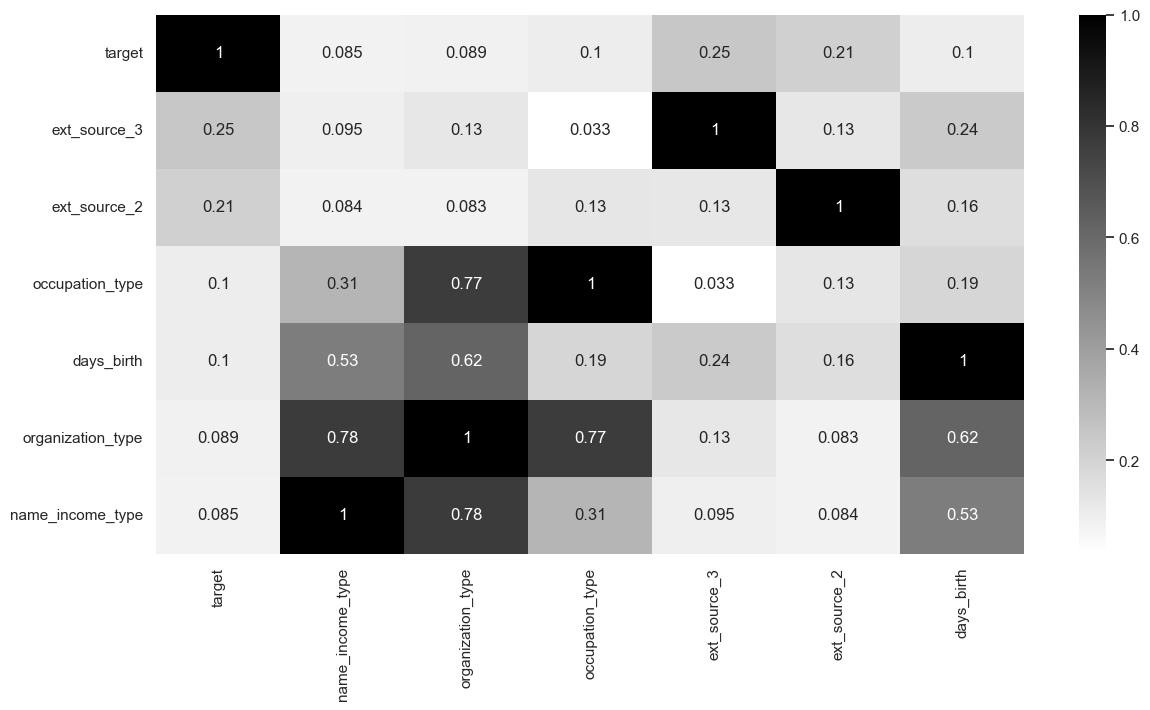

In [272]:
# making new dataframe for EDA purposes

app_train_eda = app_train_new_mvd[['target', 'name_income_type', 'organization_type', 'occupation_type',
                                   'ext_source_3', 'ext_source_2', 'days_birth']].reset_index(drop = True)

# calculating correlation for the df_cln_cor1

cor_tbl_eda = app_train_eda.phik_matrix()
cor_tbl_eda.sort_values(by=['target'], ascending=False, inplace=True)

# showing heat map for the correlation table

plt.figure(figsize=(14,7))
sns.heatmap(cor_tbl_eda, annot = True, cmap = 'binary', cbar = True, annot_kws = {'size': 12})
sns.set(font_scale=1);

`The Phik matrix` is chosen for correlation calculation because it can effectively handle different types of variables, including categorical, ordinal, and numerical. Unlike traditional correlation methods that focus solely on linear relationships between continuous variables, the `Phik matrix` extends the concept of correlation to encompass mixed variable types. 

By incorporating statistical measures like `Cramer's V` for categorical-categorical associations and point biserial correlation for categorical-continuous associations, the `Phik matrix` provides a comprehensive understanding of the relationships within a dataset. This enables us to uncover hidden patterns and dependencies that may be overlooked by traditional correlation measures, making it valuable for exploratory data analysis, feature selection, and understanding the predictive power of variables in complex datasets with diverse data types.

### iv.ii The Target

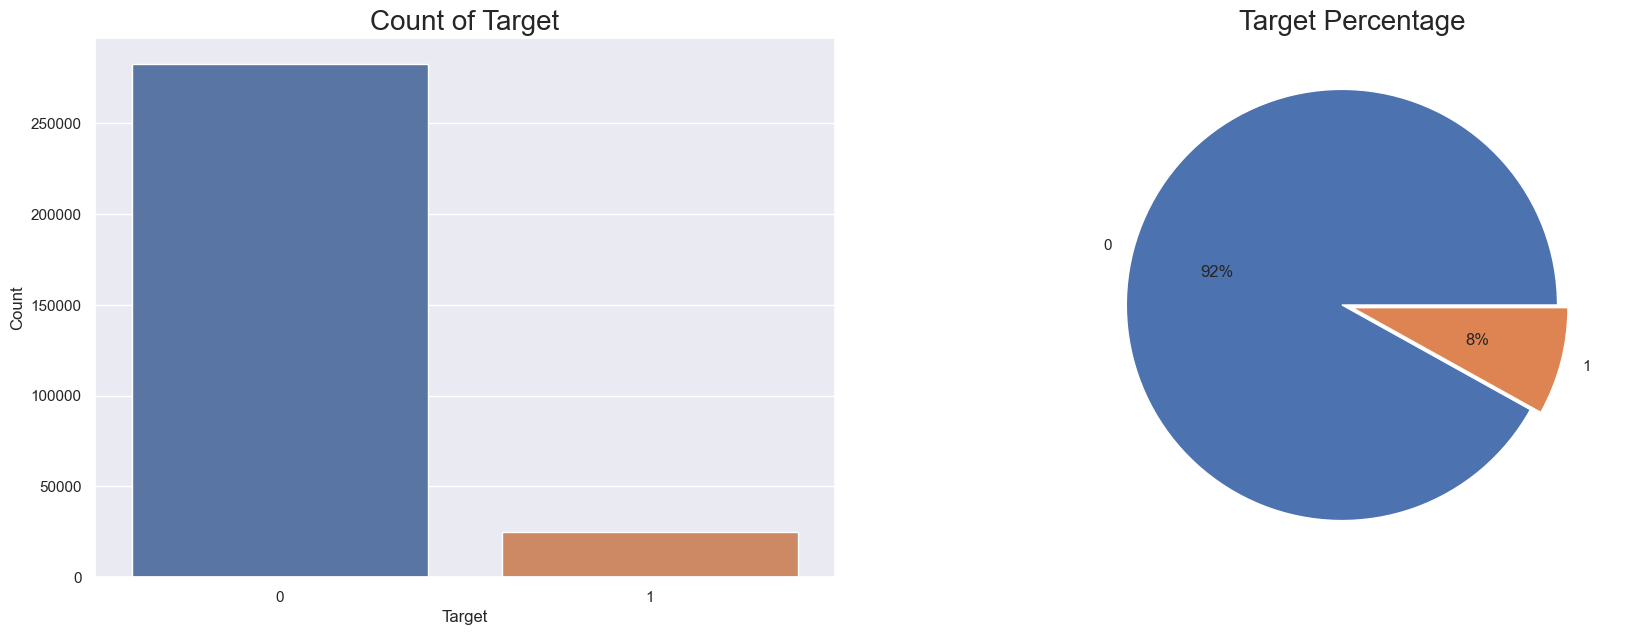

In [313]:
# defining the figure size

plt.figure(figsize = (21, 7))

# showing count plot for churn risk score

plt.subplot(1, 2, 1)
sns.countplot(x = 'target', data = app_train_eda)
plt.title('Count of Target', fontsize = 20)
plt.xlabel('Target')
plt.ylabel('Count')

# showing pie plot for churn risk score column

plt.subplot(1, 2, 2)
plt.pie(app_train_eda['target'].value_counts(),labels = list(app_train_eda['target'].value_counts().index),autopct = '%1.0f%%', explode=[0.05, 0])
plt.title('Target Percentage', fontsize = 20)

plt.show()

Default risk refers to the chance that a borrower or debtor will not be able to make their payments or fulfill their financial obligations. It is the risk of someone failing to repay their loans or meet their debt obligations. Default risk is important for lenders, investors, and creditors because it affects the potential loss or return on their investments. 

The plot reveals a clear imbalance in the data, with a majority of borrowers (around 92%) successfully repaying their loans, while only a small portion (approximately 8%) have defaulted.

Although this distribution is favorable for the business in terms of loan repayment rates, it poses challenges for accurate predictions. The significant data imbalance can lead to biased results and hinder the effectiveness of predictive models. The limited representation of loan defaults can prevent the model from learning and recognizing patterns associated with default risk.

### iv.iii Ext Source 2 & 3

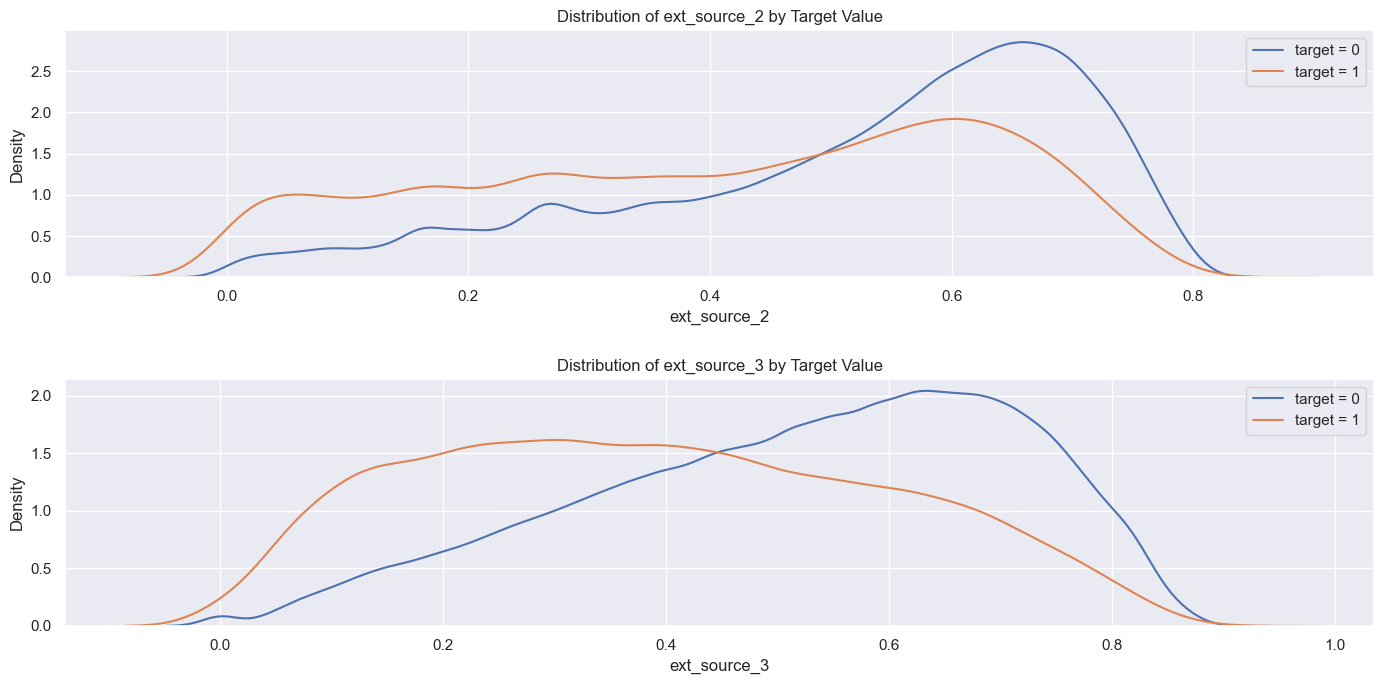

In [243]:
# defining the figure size

plt.figure(figsize = (14, 7))

# iterate through the sources
for i, source in enumerate(['ext_source_2', 'ext_source_3']):
    
    # create a new subplot for each source
    plt.subplot(2, 1, i + 1)
    
    # plot repaid loans
    sns.kdeplot(app_train_eda.loc[app_train_eda['target'] == 0, source], label = 'target = 0')
    
    # plot loans that were not repaid
    sns.kdeplot(app_train_eda.loc[app_train_eda['target'] == 1, source], label = 'target = 1')
    
    # label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
    plt.legend();
    
plt.tight_layout(h_pad = 2)

The KDE graph of `EXT_SOURCE_3` shows the biggest difference in values between the two target groups, suggesting a potential connection between this feature and the likelihood of loan repayment. On the other hand, the KDE graph of `EXT_SOURCE_2` displays a similar distribution for both target 0 and target 1. Although these relationships are considered weak, they still offer valuable information for a machine learning model to predict whether an applicant will repay a loan on time.

While the individual impact of these variables may not be strong, when combined with other relevant features, they can contribute to a more accurate prediction of loan repayment. Machine learning algorithms are adept at detecting subtle patterns and relationships within data, even if they are not immediately apparent to humans. Therefore, incorporating these variables into the model can improve its predictive ability and provide valuable insights into the probability of loan repayment.

### iv.iv Occupation Type

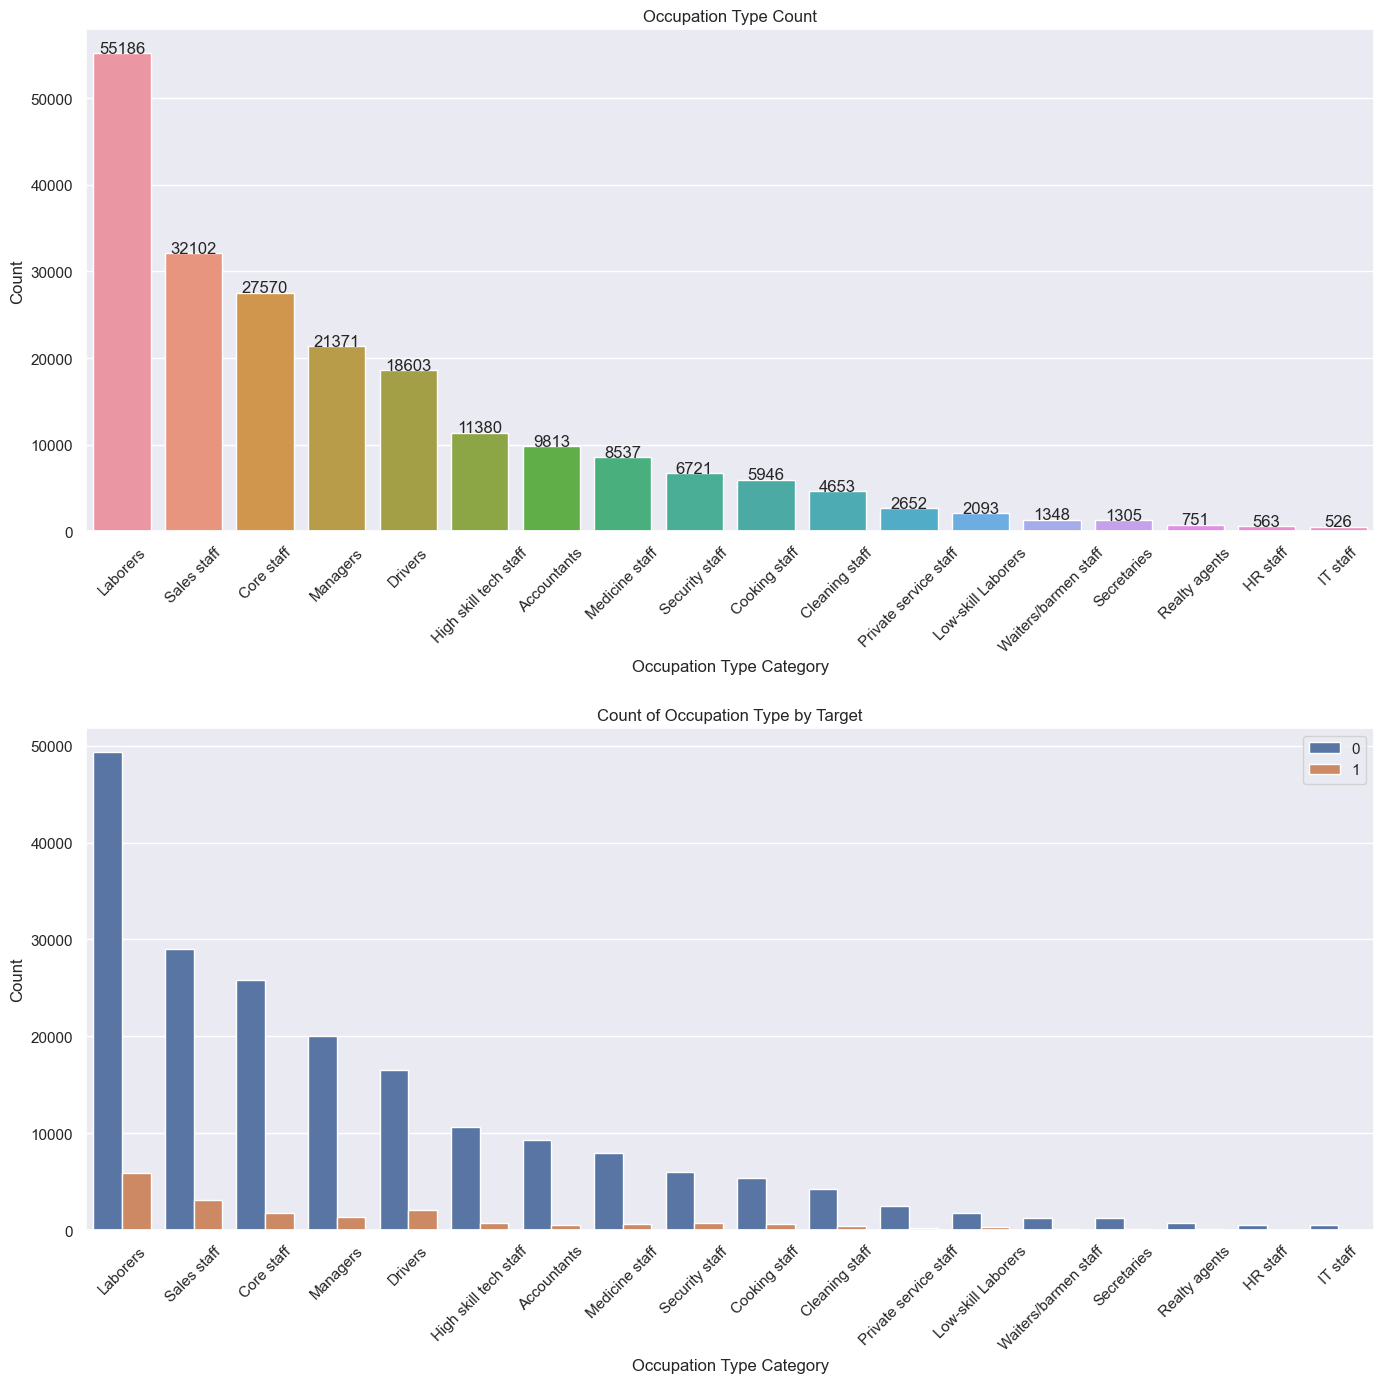

In [263]:
# defining the figure size

plt.figure(figsize = (14, 14))

# count plot of membership category

plt.subplot(2, 1, 1)
fig = sns.countplot(x = 'occupation_type', data = app_train_eda, order = app_train_eda.occupation_type.value_counts().index)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 50,
             '{:1.0f}'.format(height),
             ha = 'center')
plt.title('Occupation Type Count')
plt.xlabel('Occupation Type Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)

# count plot of membership category by churn risk score

plt.subplot(2, 1, 2)
sns.countplot(x = 'occupation_type', data = app_train_eda, hue = 'target', order = app_train_eda['occupation_type'].value_counts().index)
plt.title('Count of Occupation Type by Target')
plt.xlabel('Occupation Type Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(loc='upper right')
plt.tight_layout(h_pad = 2)

plt.show()

As indicated by the graph, `laborers` comprise the largest group of individuals borrowing from Home Credit. Despite this significant representation, the default rate among laborers remains a concern. Although they make up the highest number of borrowers, their proportion of defaults is also substantial due to their sheer volume.

The high number of `laborers` seeking loans from Home Credit could be attributed to various factors. Laborers, often engaged in lower-paying occupations, may encounter financial challenges or have limited access to traditional financial services. Consequently, they may turn to Home Credit as a viable option to address their financial needs. However, the large volume of laborers borrowing from Home Credit increases the likelihood of a higher number of defaults within this group

### iv.v Age (Days Birth)

In [273]:
# renaming the column

app_train_eda.rename(columns={'days_birth': 'age'}, inplace=True)

# convert values to positive

app_train_eda['age'] = -app_train_eda['age']

# convert values from days to years

app_train_eda['age'] = (app_train_eda['age'] / 365).astype(int)

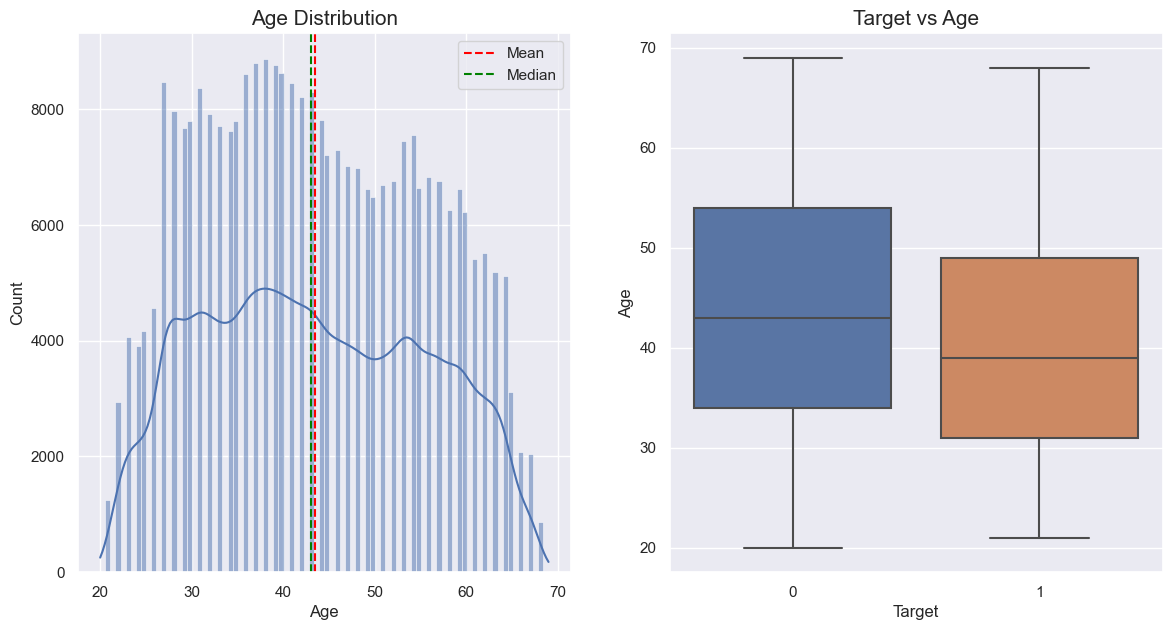

The skewness value of age column is: 0.116
The min value of age column is: 20
The max value of age column is: 69


In [274]:
# defining the figure size

plt.figure(figsize = (14, 7))

# histogram of age distrubution

plt.subplot(1, 2, 1)
sns.histplot(x = 'age', data = app_train_eda, kde = True)
plt.axvline(app_train_eda.age.mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(app_train_eda.age.median(), color = 'green', linestyle = '--', label = 'Median')
plt.title('Age Distribution', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# box plot for age vs churn risk score

plt.subplot(1, 2, 2)
sns.boxplot(x = 'target', y = 'age', data = app_train_eda)
plt.title('Target vs Age', fontsize = 15)
plt.xlabel('Target')
plt.ylabel('Age')

plt.show()

# checking skewness, min, and max values

print('The skewness value of age column is:', app_train_eda.age.skew().round(3))
print('The min value of age column is:', app_train_eda.age.min())
print('The max value of age column is:', app_train_eda.age.max())

The `age` range of customers in the dataset varies from 20 to 69 years old, with a fairly symmetrical distribution. This means that the data is not heavily skewed towards either younger or older applicants. Interestingly, there appears to be a correlation between `age` and loan repayment outcomes. It seems that younger customers have a higher likelihood of loan default compared to their older counterparts. This could be due to factors such as financial instability, limited credit history, or fewer accumulated assets among younger individuals.

These findings highlight the significance of considering `age` as a relevant factor in loan evaluation and risk assessment models. Lenders can incorporate `age` as one of the variables when assessing loan applications to gain a better understanding of the potential default risk associated with different `age` groups. Moreover, this emphasizes the need for tailored financial products and guidance aimed at younger customers, helping them improve their financial well-being and enhance their ability to repay loans effectively.

### iv.vi Organization Type

In [283]:
# calculate the count of each organization type

organization_counts = app_train_eda['organization_type'].value_counts()

# identify the organization types with a count less than 300

less_than_300 = organization_counts[organization_counts < 300].index

# replace the values with 'Others' for organization types with count less than 300

app_train_eda.loc[app_train_eda['organization_type'].isin(less_than_300), 'organization_type'] = 'Others'

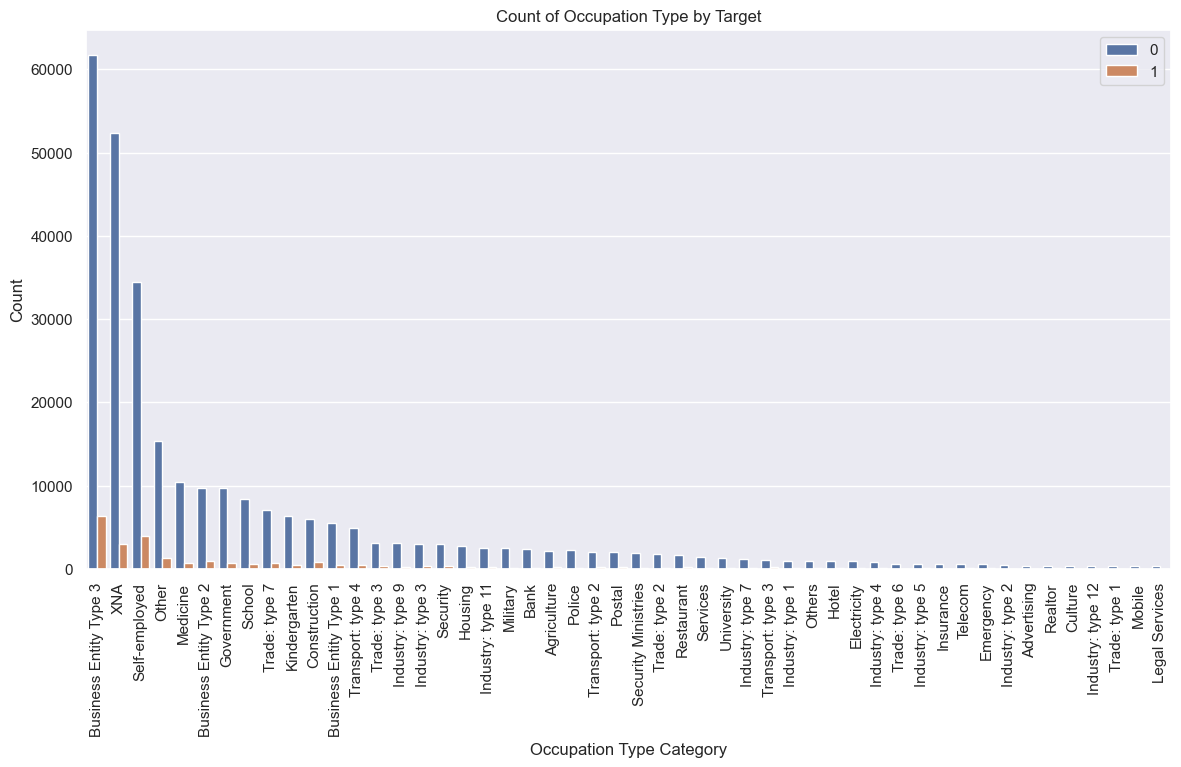

In [285]:
# count plot of membership category by churn risk score

plt.figure(figsize = (14, 7))
sns.countplot(x = 'organization_type', data = app_train_eda, hue = 'target', order = app_train_eda['organization_type'].value_counts().index)
plt.title('Count of Occupation Type by Target')
plt.xlabel('Occupation Type Category')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

In this column, we made some changes to make the data easier to read. Any occupation type with a count below 300 was grouped into the `Other` category. After this adjustment, we noticed that `Business Entity type 3`, `self-employed` individuals, and the `XNA` category were the top three occupation types with the highest difficulty in repaying loans.

There are a few possible reasons for this observation:

`Business Entity type 3` represents a specific type of business entity, and it's likely that these individuals face challenges related to the financial stability or profitability of their businesses. Their line of work may involve higher risks or increased financial obligations, which could impact their ability to pay back loans on time.

`Self-employed` individuals work for themselves and often have variable incomes. They may struggle with maintaining a consistent cash flow, leading to difficulties in repaying loans consistently. Additionally, accessing traditional banking services and securing loans may be more challenging for the self-employed, increasing the chances of default.

The `XNA` category refers to unknown or unspecified occupation types. It could indicate cases where the occupation information is missing or not properly recorded. This lack of data makes it harder to determine the specific reasons behind their loan repayment difficulties.

### iv.vii Name Income Type

In [296]:
# define the mapping of values to be changed

value_changes = {
    'Pensioner': 'Not working',
    'Unemployed': 'Not working',
    'Student': 'Not working',
    'Businessman': 'Working',
    'Maternity leave': 'Working'
}

# apply the value changes to the 'name_income_type' column

app_train_eda['name_income_type'] = app_train_eda['name_income_type'].replace(value_changes)

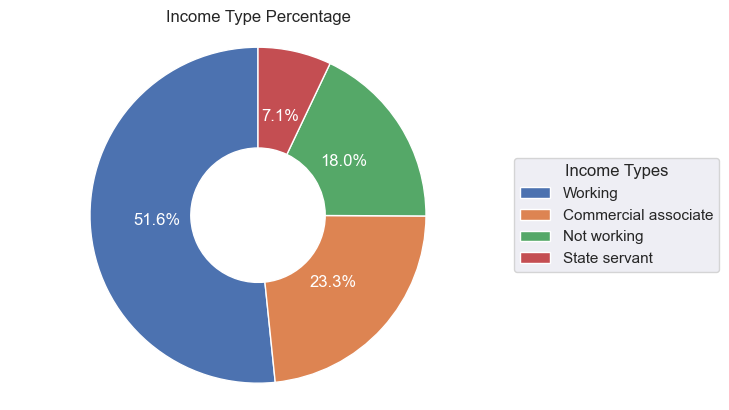

In [309]:
# calculate the count of each income type

income_type_counts = app_train_eda['name_income_type'].value_counts()

# set up the plot

fig, ax = plt.subplots()

# create the donut pie chart

wedges, texts, autotexts = ax.pie(
    income_type_counts,
    labels = income_type_counts.index,
    autopct = '%1.1f%%',
    startangle = 90,
    wedgeprops=dict(width = 0.6),
    textprops=dict(color = 'w')
)

circle = plt.Circle((0, 0), 0.2, color = 'white')
ax.add_artist(circle)
ax.set_title('Income Type Percentage')
ax.axis('equal')
plt.legend(title='Income Types', loc = 'center left', bbox_to_anchor=(1, 0.5))

plt.show()

In this column, we made some modifications to improve the relevance and readability of the data. After analyzing the modified data, we discovered that more than half of the customers rely on `working` as their primary source of income. This indicates that a significant majority of borrowers earn their income through employment.

Following the working category, we found that the next most common occupation types in the data are `commercial associates`, individuals categorized as `not working` (including `pensioners`), and `state servants`. `Commercial associates` typically refer to individuals involved in business-related activities, while the `not working` category includes individuals who are not currently employed, such as `pensioners` receiving retirement benefits. `State servants` encompass individuals working in various government or public sector roles.

Understanding the distribution of occupation types within the dataset provides valuable insights into the applicant profiles. It helps financial institutions better tailor their services to meet the specific needs of different occupation categories. By recognizing the prevalence of these occupation types, lenders can design appropriate loan products and support mechanisms that address the financial circumstances and repayment capabilities of their diverse customer base.

## v. Feature Engineering

### v.i Feature Selection

In this section, we will utilize the previous <mark>correlation calculations</mark> to guide our selection of columns to be featured in the model. By identifying the columns that demonstrate a strong correlation with the target variable, we can prioritize these highly correlated features as they are more likely to contribute to accurate predictions. 

In [64]:
# choosing several columns from the correlation calculation before to be featured to the model

app_train_cln = app_train_new_mvd[['target', 'name_income_type', 'organization_type', 'occupation_type',
                                   'ext_source_3', 'ext_source_2', 'days_birth']].reset_index(drop = True)

Additionally, we will include columns that are known to have a significant impact or are deemed relevant based on domain-specific insights. This combined approach ensures that our model incorporates both statistically significant correlations and domain-specific knowledge, resulting in a comprehensive feature set that enhances prediction accuracy.

The `credit income in percent`, `annuity income in percent`, `credit term`, and `days employed in percent` are important features when predicting an individual's capability to pay a loan for several reasons:

* **Credit Income in Percent** 

This feature calculates the ratio of the amount of credit requested to the total income of the applicant. It provides insights into the borrower's debt burden and their ability to manage their finances. A higher credit income percent indicates a larger proportion of the applicant's income being allocated towards repaying the loan, which may impact their repayment capability and financial stability.

* **Annuity Income in Percent**

This feature calculates the ratio of the loan annuity (repayment amount) to the total income of the applicant. It helps assess the borrower's capacity to meet their monthly payment obligations. A higher annuity income percent implies a larger portion of the applicant's income being allocated to loan repayment, which could potentially strain their financial resources.

* **Credit Term** 

This feature calculates the ratio of the loan annuity to the loan amount, representing the duration it would take to repay the loan in full. It provides information on the borrower's repayment obligations relative to the loan principal. A shorter credit term indicates a higher monthly payment requirement, potentially influencing the borrower's ability to meet their financial obligations consistently.

* **Days Employed in Percent** 

This feature calculates the ratio of the number of days employed to the applicant's age (measured in days). It offers insights into the stability of the borrower's employment and their career trajectory. A higher days employed percent suggests longer work experience relative to the borrower's age, which may indicate greater job security and stability in terms of income.

By incorporating these factors, predictive models can better assess the borrower's financial capacity and evaluate their likelihood of successfully repaying the loan, enabling lenders to make more informed decisions regarding loan approvals and risk management.

In [65]:
# choosing several columns from the domain knowledge to be featured to the model 

app_train_cln['credit_income_percent'] = app_train_new_mvd['amt_credit'] / app_train_new_mvd['amt_income_total']
app_train_cln['annuity_income_percent'] = app_train_new_mvd['amt_annuity'] / app_train_new_mvd['amt_income_total']
app_train_cln['credit_term'] = app_train_new_mvd['amt_annuity'] / app_train_new_mvd['amt_credit']
app_train_cln['days_employed_percent'] = app_train_new_mvd['days_employed'] / app_train_new_mvd['days_birth']

In [66]:
# showing the new table

app_train_cln

,target,name_income_type,organization_type,occupation_type,ext_source_3,ext_source_2,days_birth,credit_income_percent,annuity_income_percent,credit_term,days_employed_percent
0,1,Working,Business Entity Type 3,Laborers,0.139376,0.262949,-9461,2.007889,0.121978,0.060749,0.067329
1,0,State servant,School,Core staff,NaN,0.622246,-16765,4.790750,0.132217,0.027598,0.070862
2,0,Working,Government,Laborers,0.729567,0.555912,-19046,2.000000,0.100000,0.050000,0.011814
3,0,Working,Business Entity Type 3,Laborers,NaN,0.650442,-19005,2.316167,0.219900,0.094941,0.159905
4,0,Working,Religion,Core staff,NaN,0.322738,-19932,4.222222,0.179963,0.042623,0.152418
...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Working,Services,Sales staff,NaN,0.681632,-9327,1.617143,0.174971,0.108198,0.025303
307507,0,Pensioner,XNA,NaN,NaN,0.115992,-20775,3.743750,0.166687,0.044524,-17.580890
307508,0,Working,School,Managers,0.218859,0.535722,-14966,4.429176,0.195941,0.044239,0.529266
307509,1,Commercial associate,Business Entity Type 1,Laborers,0.661024,0.514163,-11961,2.164368,0.118158,0.054592,0.400134


### v.ii Missing Value Handling

In this section, our focus is on handling missing values in categorical columns <mark>before saving the inference data</mark>. The approach that we will use here is to replace the missing value with `Others`. Once the categorical missing values are handled, we can proceed to save the inference data. 

However, it's important to note that the remaining columns with missing values will be treated separately using the `KNNImputer` technique in a later stage, which is a comprehensive approach implemented within a data preprocessing pipeline.

In [67]:
# calculate the missing value

calculate_missing_percentage(app_train_cln).head(10)

,Column,Missing Percentage
0,occupation_type,31.345545
1,ext_source_3,19.825307
2,ext_source_2,0.214626
3,annuity_income_percent,0.003902
4,credit_term,0.003902
5,target,0.000000
6,name_income_type,0.000000
7,organization_type,0.000000
8,days_birth,0.000000
9,credit_income_percent,0.000000


In [68]:
# handling the missing value by imputing

app_train_cln['occupation_type'].fillna('Others', inplace=True)

### v.iii Saving Inference Data

In this section, we will save 200 sample data from the `app_train_cln`. We will use this data for inference process later after training and validating the model.

In [69]:
# saving inference data

inference = app_train_cln.sample(200, random_state = 42)
inference.to_csv('Application_inference.csv', index=False)

# removing the sample data from the main data

app_train_cln = app_train_cln.drop(inference.index)

inference

,target,name_income_type,organization_type,occupation_type,ext_source_3,ext_source_2,days_birth,credit_income_percent,annuity_income_percent,credit_term,days_employed_percent
245895,0,Commercial associate,Business Entity Type 3,Sales staff,0.000527,0.604894,-13297,2.248587,0.254304,0.113095,0.057306
98194,0,Commercial associate,Business Entity Type 3,Managers,0.712155,0.425351,-14778,5.178636,0.197764,0.038188,0.077209
36463,0,Working,Self-employed,Sales staff,0.207964,0.531760,-17907,2.444444,0.193133,0.079009,0.035684
249923,0,State servant,Business Entity Type 3,High skill tech staff,0.614414,0.693521,-19626,1.029091,0.100764,0.097915,0.355753
158389,0,Working,Business Entity Type 3,Laborers,0.636376,0.560690,-20327,2.738960,0.141000,0.051479,0.054361
...,...,...,...,...,...,...,...,...,...,...,...
233274,0,Commercial associate,Government,Managers,0.324891,0.700425,-13318,2.352941,0.158088,0.067187,0.205286
305592,0,Working,Business Entity Type 3,Others,0.312365,0.702947,-14061,7.222222,0.279833,0.038746,0.020411
299158,0,Working,Other,Drivers,0.429424,0.634161,-17344,2.422400,0.113650,0.046916,0.135378
184987,0,Working,Kindergarten,Core staff,0.610991,0.533388,-14032,9.224600,0.269700,0.029237,0.146308


### v.iv Spliting the Data

We will split the data into a training set (70%), a validation set (20%), and a testing set (10%).

In [70]:
# spliting the table to train, validation, and train dataset

X = app_train_cln.drop('target', axis=1)
y = app_train_cln['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state = 42)

# checking the shape of train-set and test-set

for i in [X_train, X_val, X_test, y_train, y_val, y_test]:
    print(i.shape)

(221263, 10)
(55316, 10)
(30732, 10)
(221263,)
(55316,)
(30732,)


After we split the data, we can see that all the variables' rows and columns are the same. This indicates that the split process has finished without any problems.

In [71]:
# showing the X_train values

X_train

,name_income_type,organization_type,occupation_type,ext_source_3,ext_source_2,days_birth,credit_income_percent,annuity_income_percent,credit_term,days_employed_percent
79613,Working,Business Entity Type 2,Laborers,0.583238,0.702550,-11445,3.875850,0.182100,0.046983,0.193709
185260,Working,Electricity,Laborers,0.622922,0.687192,-20645,6.363636,0.168400,0.026463,0.134657
123881,Working,Medicine,Medicine staff,0.719491,0.539728,-20501,7.124150,0.257300,0.036117,0.231355
132579,Working,Transport: type 4,Drivers,0.633032,0.434069,-13269,5.555556,0.271833,0.048930,0.065190
307444,Working,Self-employed,Others,NaN,0.452707,-13959,3.000000,0.150000,0.050000,0.156888
...,...,...,...,...,...,...,...,...,...,...
197751,Pensioner,XNA,Others,0.520898,0.666039,-22817,4.254966,0.122931,0.028891,-16.007494
43301,Commercial associate,Trade: type 2,Laborers,0.443615,0.514403,-10099,1.600000,0.080000,0.050000,0.222299
107012,Commercial associate,Business Entity Type 3,Accountants,0.697147,0.682135,-21376,4.081171,0.211729,0.051879,0.053845
280535,State servant,Industry: type 9,Others,0.549597,0.456720,-16249,1.066000,0.106000,0.099437,0.421995


In [72]:
# showing the X_val values

X_val

,name_income_type,organization_type,occupation_type,ext_source_3,ext_source_2,days_birth,credit_income_percent,annuity_income_percent,credit_term,days_employed_percent
98121,Pensioner,XNA,Others,0.600658,0.419301,-23925,2.698000,0.141533,0.052459,-15.266165
75722,Working,Self-employed,Sales staff,0.621226,0.597360,-19466,2.000000,0.096700,0.048350,0.095192
120082,Working,Business Entity Type 3,Sales staff,NaN,0.433097,-16022,2.857143,0.207886,0.072760,0.089127
288986,Pensioner,XNA,Others,0.766234,0.611460,-24849,1.250000,0.122500,0.098000,-14.698499
258444,Pensioner,XNA,Others,0.184116,0.169786,-22906,4.528000,0.331000,0.073101,-15.945298
...,...,...,...,...,...,...,...,...,...,...
68340,Working,Transport: type 2,Core staff,0.780144,0.683721,-22412,3.556000,0.173675,0.048840,0.152954
23105,Commercial associate,Business Entity Type 3,Others,0.265049,0.215416,-17781,5.010852,0.199259,0.039766,0.016197
199752,Working,School,Core staff,NaN,0.499696,-15930,3.225806,0.122548,0.037990,0.392593
102164,Pensioner,XNA,Others,NaN,0.400137,-23321,3.400000,0.368067,0.108255,-15.661550


In [73]:
# showing the X_test values

X_test

,name_income_type,organization_type,occupation_type,ext_source_3,ext_source_2,days_birth,credit_income_percent,annuity_income_percent,credit_term,days_employed_percent
193608,Working,Business Entity Type 3,Drivers,0.143758,0.676878,-19819,0.579195,0.069085,0.119278,0.052475
232236,Working,Medicine,Core staff,0.652897,0.718328,-17623,7.986667,0.233500,0.029236,0.501163
186440,Working,Business Entity Type 2,HR staff,0.058826,0.491994,-10741,2.000000,0.100000,0.050000,0.287776
276575,Working,Business Entity Type 3,Others,0.332851,0.712500,-9643,1.415000,0.092850,0.065618,0.114487
50658,Pensioner,XNA,Others,0.340906,0.665878,-22537,6.666667,0.194933,0.029240,-16.206372
...,...,...,...,...,...,...,...,...,...,...
89154,State servant,School,Cooking staff,0.218859,0.101356,-12084,1.831667,0.148444,0.081043,0.328120
34991,Working,Services,Private service staff,0.747663,0.525156,-14029,1.250000,0.123625,0.098900,0.227172
165669,State servant,Government,High skill tech staff,NaN,0.072392,-9942,2.777778,0.150667,0.054240,0.266546
74949,Pensioner,XNA,Others,0.569149,0.299780,-21897,1.474133,0.082956,0.056274,-16.680047


### v.v Outlier Handling

In this section, our objective is to identify outliers present in each numerical column of the dataset. We will adopt a specific approach to handle outliers by <mark>capping</mark> any values that more than the <mark>threshold which is 25% of the total data</mark>, if needed.

This will be achieved by implementing a pipeline to streamline the outlier detection and capping process. By applying this technique, we aim to mitigate the impact of outliers on our analysis and maintain data integrity within an acceptable range.

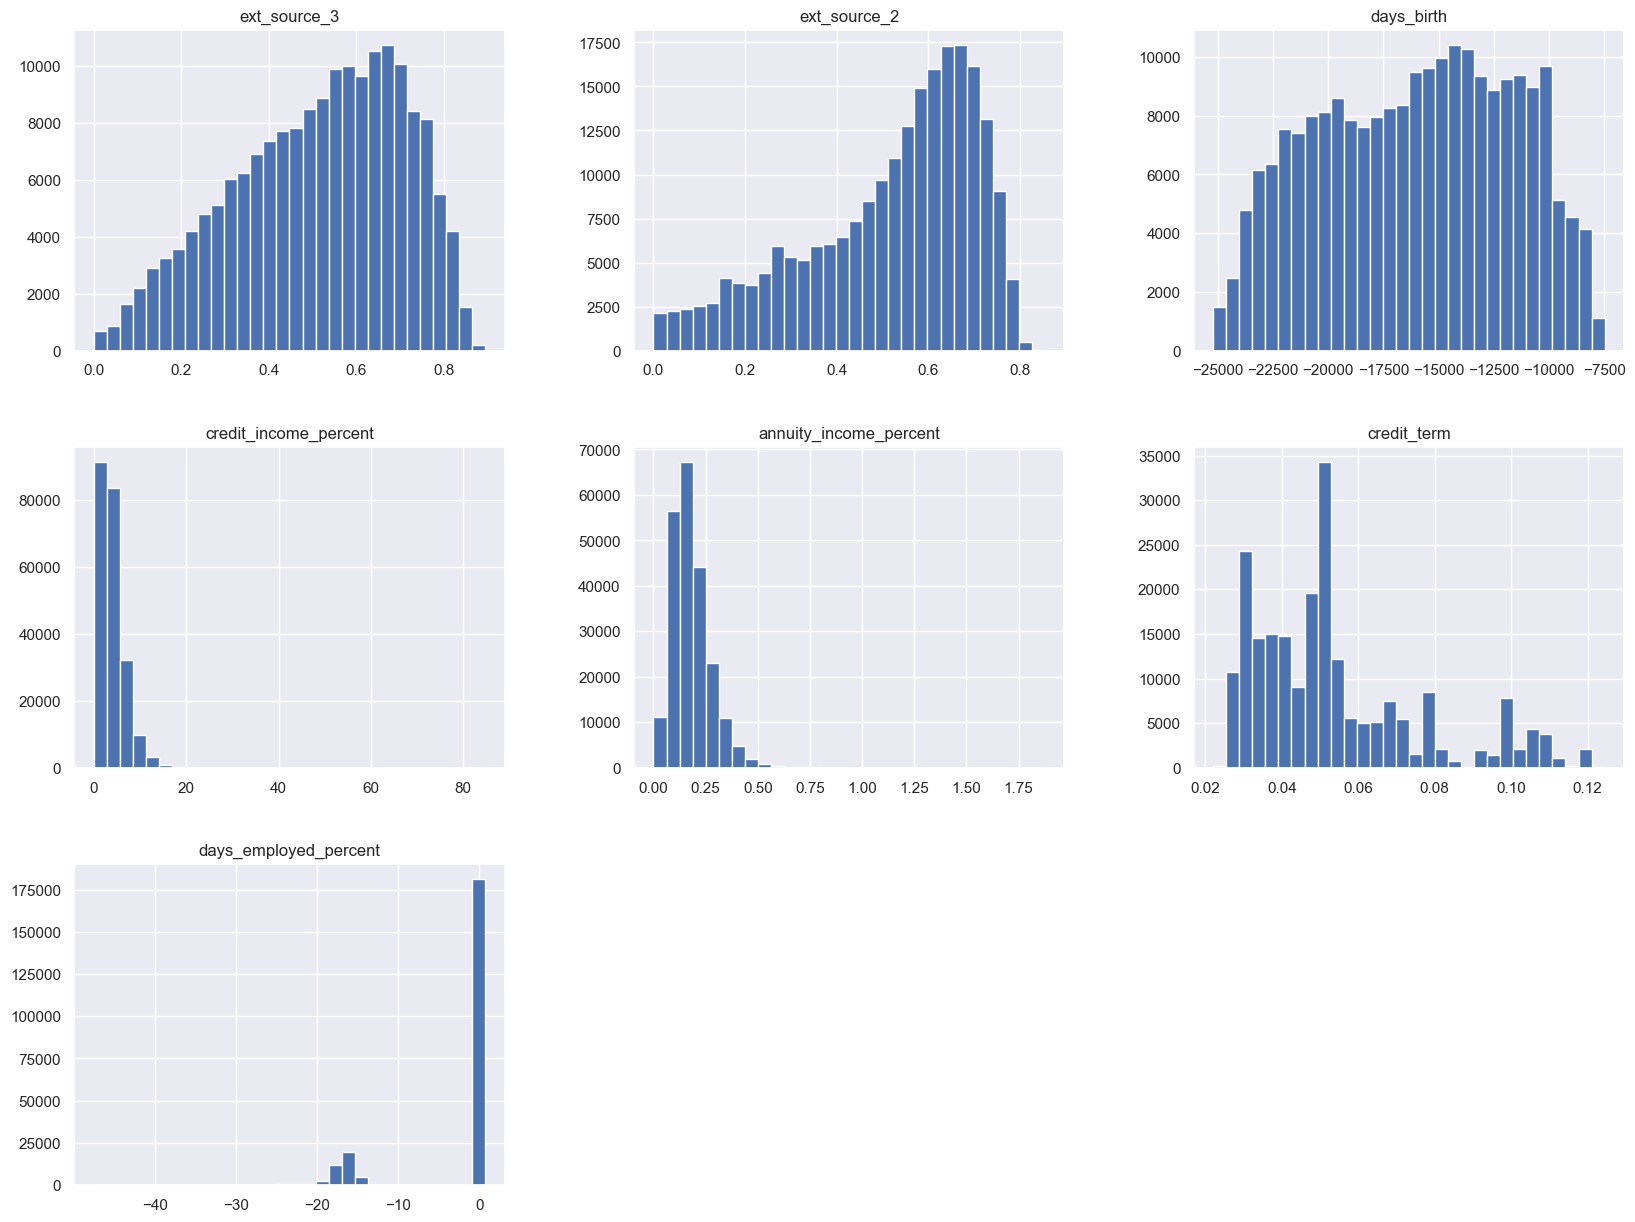

In [74]:
# showing the histogram for X_train

X_train.hist(bins=30, figsize=(20, 15))
plt.show()

In [75]:
# making function for the outliers detection

def outlier_percent(X_train):
    Q1 = X_train.quantile(0.25)
    Q3 = X_train.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((X_train < minimum) | (X_train > maximum))
    num_total = X_train.count()
    return (num_outliers/num_total)*100

# printing how many percent of outliers in every numerical columns

for column in X_train.select_dtypes(include='number').columns:
    percent = str(round(outlier_percent(X_train[column]), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "ext_source_3": 0.0%
Outliers in "ext_source_2": 0.0%
Outliers in "days_birth": 0.0%
Outliers in "credit_income_percent": 3.74%
Outliers in "annuity_income_percent": 2.57%
Outliers in "credit_term": 5.19%
Outliers in "days_employed_percent": 22.01%


Based on our observation, the presence of outliers within the dataset is <mark>below the predetermined threshold</mark>. Consequently, we have determined that there is <mark>no immediate need to address the outliers</mark> in this particular scenario.

### v.vi Scaling Type Detection

In this section, our objective is to examine the distribution of each column within the dataset. By analyzing the distribution, we can determine the most suitable scaler to use for further data processing.

In [76]:
# checking the skewness value in every numerical column

for skew in app_train_cln.select_dtypes(include='number').columns:
    print(f'Skewness value in "{skew}": ', round(app_train_cln[skew].skew(), 2))

Skewness value in "target":  3.08
Skewness value in "ext_source_3":  -0.41
Skewness value in "ext_source_2":  -0.79
Skewness value in "days_birth":  -0.12
Skewness value in "credit_income_percent":  1.84
Skewness value in "annuity_income_percent":  1.51
Skewness value in "credit_term":  1.12
Skewness value in "days_employed_percent":  -1.76


The analysis of the dataset revealed that a significant number of columns exhibit <mark>high skewness values</mark>. In order to address this skewness and achieve a more symmetric distribution, we will employ the `PowerTransformer` as our chosen scaler. The `PowerTransformer` is a transformation technique that applies a power function to the data, helping to reduce the impact of extreme values and improve the normality of the distribution. 

By including the <mark>scaling process within a pipeline</mark>, we can seamlessly integrate it into our data preprocessing workflow, ensuring that the transformation is consistently applied to the appropriate columns and facilitating efficient and streamlined data preparation for subsequent modeling steps.

### vi.vii Dimention Reduction with Principal Component Analysis (PCA)

In this scenario, we employ Principal Component Analysis (PCA) as a dimensionality reduction technique. By setting the parameter `n_components` to <mark>0.9</mark>, we instruct PCA to automatically generate a sufficient number of <mark>Principal Components (PCs) that preserve 90% of the variance present in the dataset</mark>. This ensures that we retain the majority of the important information while reducing the dimensionality of the data.

By incorporating <mark>this step into our pipeline</mark>, we can effectively address the challenges posed by high-dimensional data and subsequently proceed with the modeling using Function and Sequential API.

### v.viii Making Pipeline and Tensorflow Pipeline (Extract, Transform, Load)

This is an attempt to create a pipeline to save time and effort. Automation is a powerful tool that can improve the efficiency and accuracy of our work. In this case, we are automating the process of handling outliers and scaling the data. This will help us to train more accurate models.

In [77]:
# pipeline for numerical columns type

num_pipeline = Pipeline([
        ('imputer', KNNImputer()),
        ('scaler', PowerTransformer()),
        ('pca', PCA(n_components=.9, random_state = 42))
    ])

In [78]:
# pipeline for categorical columns with One Hot Encoder

ohe_pipeline = Pipeline([
        ('ohe', OneHotEncoder(sparse=False))])

In [79]:
# pipeline for categorical columns with Ordinal Encoder

inc_order = ['Businessman', 'State servant', 'Working', 'Commercial associate', 'Student', 'Pensioner', 'Maternity leave', 'Unemployed']

ord_pipeline = Pipeline([
        ('ordinal', OrdinalEncoder(categories=[inc_order]))
        ])

In [80]:
# combining all scaling and encoding pipelines into one

preprocess = ColumnTransformer([
        ("num", num_pipeline, ['ext_source_3', 'ext_source_2', 'days_birth', 'credit_income_percent',
                               'annuity_income_percent', 'credit_term', 'days_employed_percent']),
        ("ohe", ohe_pipeline, ['occupation_type', 'organization_type']),
        ("ord", ord_pipeline, ['name_income_type'])
    ])

In [81]:
# making preprocessing pipeline with resampling

resample = Pipeline([   
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state = 42))
        ])

In our resampling pipeline, we initially <mark>attempted to use oversampling but encountered an error</mark>. As an alternative, we experimented with combining methods like `SMOTETomek` and `SMOTEENN`, but the prediction <mark>results were unsatisfactory</mark>. Therefore, we concluded that <mark>under-sampling is the best resampling technique for this case in terms of both results and pipeline stability, despite the data reduction it entails</mark>.

In [82]:
# applying resampling to X_train and y_train

X_train_final, y_train_final = resample.fit_resample(X_train, y_train)

In [83]:
# applying preprocessing to X_val

X_val_final = preprocess.transform(X_val)

In [84]:
# applying preprocessing to X_test

X_test_final = preprocess.transform(X_test)

In [85]:
# showing y_train value counts before resampling

y_train.value_counts()

0    203405
1     17858
Name: target, dtype: int64

In [86]:
# showing y_train value counts after resampling

y_train_final.value_counts()

0    17858
1    17858
Name: target, dtype: int64

Next, we will make the Tensorflow pipeline or also known as <mark>Extract, Transform, Load (ETL)</mark>.

In [87]:
# ETL for train-set

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train_final)).shuffle(10000).batch(1024)

# ETL for val-set

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).batch(1024)

# ETL for test-set

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test)).batch(1024)

## vi. Model Definition

In this assignment, we will utilize two algorithms to tackle the task at hand: `LGBM` (Light Gradient Boosting Machine) as our `Machine Learning` algorithm and the `Sequential API model` as our `Deep Learning` algorithm. Our objective is to determine which algorithm yields a higher score, indicating better performance. The algorithm with the higher score will then undergo further tuning to optimize its performance.

In [120]:
# clear session

seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [121]:
# create sequential model

model_sequential = Sequential()

model_sequential.add(Dense(2, activation='relu', input_shape=(X_train_final.shape[1],))) # input layer and hidden layer 1
model_sequential.add(Dense(1, activation='sigmoid')) # output layer

# showing the sequential model's summary

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 168       
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


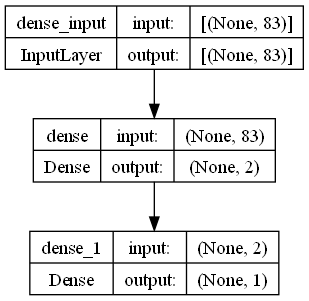

In [122]:
# showing the sequential model architecture

plot_model(model_sequential, to_file='model_sequential_architecture.png', show_shapes=True)

___

In [123]:
# defining the model with LGBM

lgbm = LGBMClassifier(random_state = 42, silent=-1, verbose=-1)

In [124]:
# making LGBM Pipeline

lgbm_pipe = Pipeline([   
        ('preprocessing', preprocess),
        ('under', RandomUnderSampler(random_state = 42)),
        ('classifier', LGBMClassifier(random_state = 42, silent=-1, verbose=-1))
        ])

## vii. Model Training

In general, the purposes of training the model are to generalize well to new data, accurately predict or classify new data points, and enable decision-making. In this section, all baseline models will be trained.

In [125]:
# clear session

seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [126]:
# compiling the sequential model

model_sequential.compile(loss='binary_crossentropy',
                         optimizer = 'adam',
                         metrics='accuracy')

# training the sequential model

history_seq = model_sequential.fit(train_dataset,
                                    epochs = 100,
                                    validation_data = val_dataset,
                                    verbose = 1)

Epoch 1/100


35/35 [==============================] - 1s 11ms/step - loss: 0.7169 - accuracy: 0.5000 - val_loss: 0.5826 - val_accuracy: 0.9193
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 0.7028 - accuracy: 0.5023 - val_loss: 0.5922 - val_accuracy: 0.8612
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 0.6957 - accuracy: 0.5048 - val_loss: 0.5997 - val_accuracy: 0.8426
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.5290 - val_loss: 0.6050 - val_accuracy: 0.8265
Epoch 5/100
35/35 [==============================] - 0s 6ms/step - loss: 0.6863 - accuracy: 0.5463 - val_loss: 0.6088 - val_accuracy: 0.8120
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 0.6831 - accuracy: 0.5637 - val_loss: 0.6112 - val_accuracy: 0.7992
Epoch 7/100
35/35 [==============================] - 0s 6ms/step - loss: 0.6803 - accuracy: 0.5799 - val_loss: 0.6126 - val_accuracy: 0.7888
Epoch 8/100
35/35 [=====

___

In [127]:
# training with LGBM

lgbm.fit(X_train_final, y_train_final, eval_set=[(X_val_final, y_val)], eval_metric='auc', verbose = 0)

LGBMClassifier(random_state=42, silent=-1, verbose=-1)

## viii. Model Evaluation

### viii.i Predict and Insightful Plots

In [128]:
# creating dataFrame for sequential model history in order to make it easy to plot

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.618907,0.659312,0.625161,0.655507
96,0.619014,0.659256,0.624718,0.656212
97,0.618898,0.659060,0.624706,0.656212
98,0.618785,0.659172,0.624799,0.656139
99,0.618717,0.659648,0.624907,0.656067


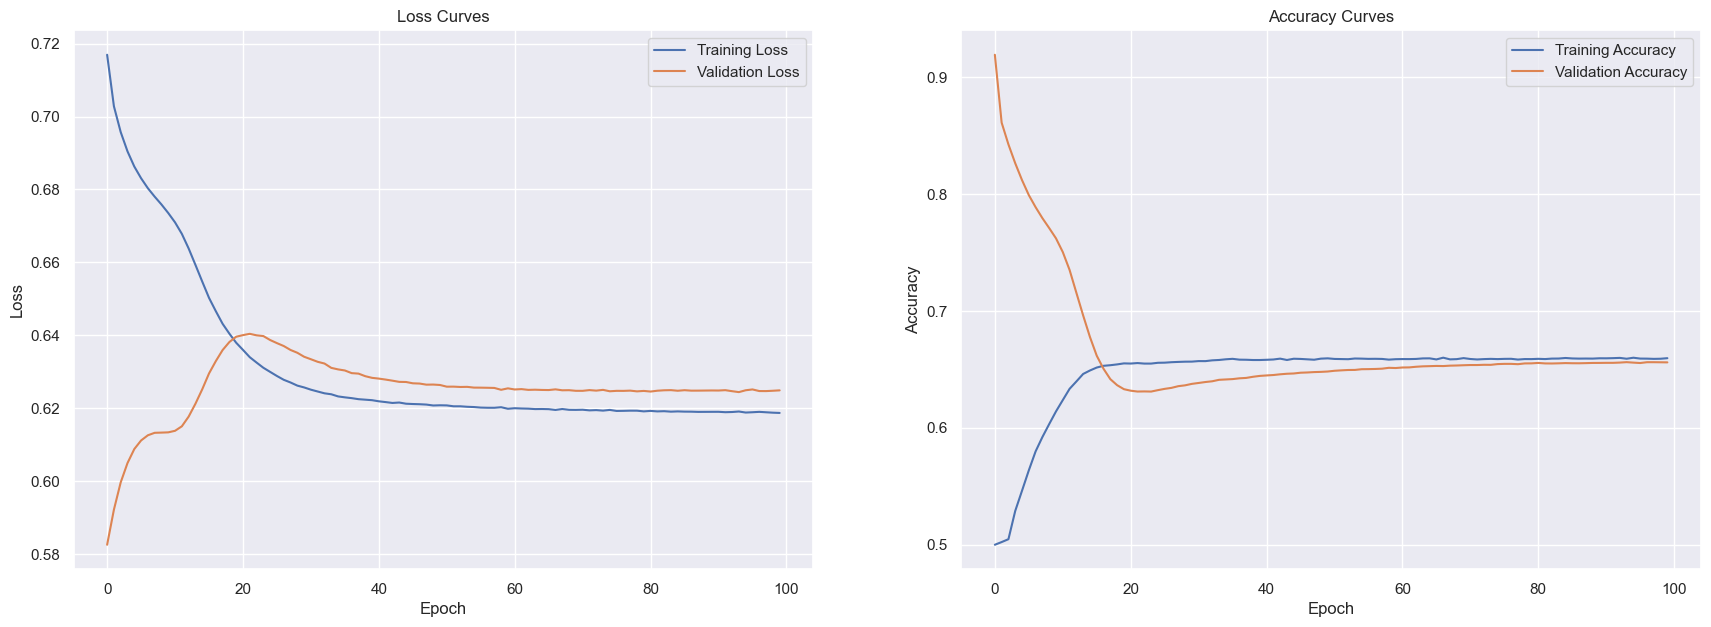

In [163]:
# defining the figure size

plt.figure(figsize=(21, 7))

# ploting the loss curves

plt.subplot(1, 2, 1)
plt.plot(history_seq_df.loss, label='Training Loss')
plt.plot(history_seq_df.val_loss, label='Validation Loss')
plt.legend()
plt.title('Sequential API model Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# plotting the accuracy curves

plt.subplot(1, 2, 2)
plt.plot(history_seq_df.accuracy, label='Training Accuracy')
plt.plot(history_seq_df.val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Sequential API model Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [130]:
# convert validation dataset to NumPy arrays

val_ftr_seq = np.concatenate([x for x, _ in val_dataset], axis=0)
val_true_labels_seq = np.concatenate([y for _, y in val_dataset], axis=0)

# make predictions on validation dataset

val_pred_seq = model_sequential.predict(val_ftr_seq)

# calculate the AUC-ROC score for the Sequential Model

auc_roc_score_seq = roc_auc_score(val_true_labels_seq, val_pred_seq)

print("AUC-ROC score for the Sequential Model:", round(auc_roc_score_seq, 5))

1729/1729 [==============================] - 2s 861us/step
AUC-ROC score for the Sequential Model: 0.7202


In [131]:
# showing the evaluation scores of the improved model to test dataset

results = model_sequential.evaluate(test_dataset)

print(f'Test-set Loss for sequential model    : {results[0]:.2f}')
print(f'Test-set Accuracy for sequential model: {results[1]:.2f}')

31/31 [==============================] - 0s 3ms/step - loss: 0.6287 - accuracy: 0.6500
Test-set Loss for sequential model    : 0.63
Test-set Accuracy for sequential model: 0.65


In [154]:
# evaluate the sequential model test-set with threshold of 0.4

y_pred_seq4 = model_sequential.predict(X_test_final)
y_pred_seq4 = np.where(y_pred_seq4 >= 0.4, 1, 0)

print('Classification report for Sequential API model test-set:')
print(classification_report(y_test, y_pred_seq4))

961/961 [==============================] - 2s 2ms/step
Classification report for Sequential API model test-set:
              precision    recall  f1-score   support

           0       0.97      0.50      0.66     28252
           1       0.12      0.80      0.21      2480

    accuracy                           0.52     30732
   macro avg       0.54      0.65      0.44     30732
weighted avg       0.90      0.52      0.62     30732



In [152]:
# evaluate the sequential model test-set with threshold of 0.5

y_pred_seq5 = model_sequential.predict(X_test_final)
y_pred_seq5 = np.where(y_pred_seq5 >= 0.5, 1, 0)

print('Classification report for Sequential API model test-set:')
print(classification_report(y_test, y_pred_seq5))

961/961 [==============================] - 2s 2ms/step
Classification report for Sequential API model test-set:
              precision    recall  f1-score   support

           0       0.96      0.65      0.77     28252
           1       0.14      0.67      0.24      2480

    accuracy                           0.65     30732
   macro avg       0.55      0.66      0.50     30732
weighted avg       0.89      0.65      0.73     30732



In [153]:
# evaluate the sequential model test-set with threshold of 0.6

y_pred_seq6 = model_sequential.predict(X_test_final)
y_pred_seq6 = np.where(y_pred_seq6 >= 0.6, 1, 0)

print('Classification report for Sequential API model test-set:')
print(classification_report(y_test, y_pred_seq6))

961/961 [==============================] - 2s 2ms/step
Classification report for Sequential API model test-set:
              precision    recall  f1-score   support

           0       0.95      0.78      0.85     28252
           1       0.17      0.53      0.26      2480

    accuracy                           0.76     30732
   macro avg       0.56      0.65      0.56     30732
weighted avg       0.89      0.76      0.81     30732



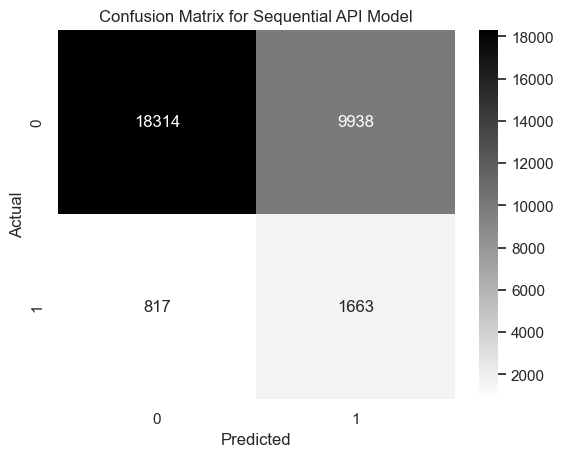

In [157]:
# showing confusion matrix for sequential model

cm_seq = confusion_matrix(y_test, y_pred_seq5)
sns.heatmap(cm_seq, annot=True, fmt="d", cmap="binary")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sequential API Model')
plt.show()

In terms of the `Sequential API` model, it is considered a <mark>good fit</mark> as well as there is a small gap between the loss and accuracy lines compared to their validation counterparts. The model achieves an <mark>accuracy score of around 65% and a loss of approximately 63%</mark>. This <mark>stability</mark> in performance is reached <mark>after about 80 epochs</mark>.

The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) score is a widely used evaluation metric for binary classification models, particularly in cases where the dataset is imbalanced. It measures the performance of a model in distinguishing between positive and negative samples. As for the AUC-ROC score for the `Sequential API` Model is 0.7202.

In this case, we experimented with different <mark>threshold</mark> values to make predictions using our model. We tried thresholds of <mark>0.4, 0.5, and 0.6</mark> to find the best point for classification. After careful evaluation, we decided to use a threshold of 0.5 because it consistently gave us the most reliable recall score compared to the other thresholds.

Our main focus was on the <mark>recall</mark> metric, which helps us minimize the number of false negatives. False negatives occur when the model mistakenly predicts that borrowers will repay their loans, but they actually end up defaulting. As a financial institution, it's crucial to identify these cases to reduce the risk of potential loan defaults.

However, despite our efforts to optimize the recall metric, our model still produced more than 800 false negatives. This means that there were over 800 instances where borrowers were predicted to be capable of repaying their loans but ultimately failed to do so. This is a significant concern as it poses financial risks for the lending institution.

---

Classification report for LGBM train-set:

              precision    recall  f1-score   support

           0       0.70      0.71      0.70     17858
           1       0.70      0.69      0.70     17858

    accuracy                           0.70     35716
   macro avg       0.70      0.70      0.70     35716
weighted avg       0.70      0.70      0.70     35716

*******************************************************
Classification report for LGBM test-set:

              precision    recall  f1-score   support

           0       0.96      0.67      0.79     28252
           1       0.15      0.65      0.24      2480

    accuracy                           0.67     30732
   macro avg       0.55      0.66      0.51     30732
weighted avg       0.89      0.67      0.74     30732


Confusion Matrix for LGBM test-set:


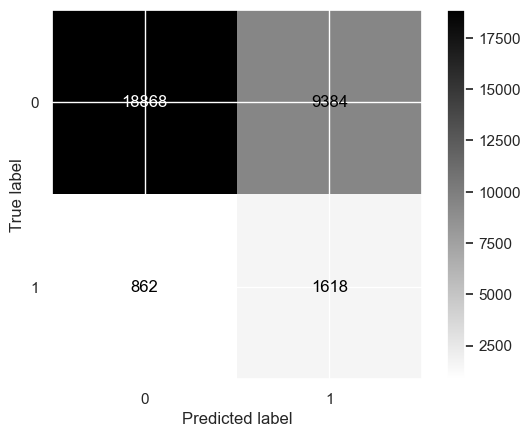

In [164]:
# predict with LGBM

lgbm_train = lgbm.predict(X_train_final)
lgbm_test = lgbm.predict(X_test_final)

print('Classification report for LGBM train-set:')
print('')
print(classification_report(y_train_final, lgbm_train))
print('*'*55)
print('Classification report for LGBM test-set:')
print('')
print(classification_report(y_test, lgbm_test))
print('')
print('Confusion Matrix for LGBM test-set:')
ConfusionMatrixDisplay.from_estimator(lgbm, X_test_final, y_test, cmap='binary')
plt.show()

In [135]:
# calculate the AUC-ROC score for the LGBM algorithm

lgbm_val_pred = lgbm.predict_proba(X_val_final)[:, 1]
lgbm_val_auc = roc_auc_score(y_val, lgbm_val_pred)

print("LGBM Validation AUC:", round(lgbm_val_auc, 5))

LGBM Validation AUC: 0.72436


The `LGBM` (Light Gradient Boosting Machine) algorithm also proved to be a <mark>good fit</mark> for the data, just like the `Sequential API` model. We compared the metric scores, especially the <mark>recall</mark> score, between the training set and the test set, and found that they were quite similar. This indicates that the `LGBM` algorithm <mark>generalizes well and performs consistently across different datasets</mark>.

In terms of the `AUC-ROC` score, the `LGBM` algorithm achieved a value of <mark>0.72436</mark>, which is <mark>higher</mark> than the score obtained by the `Sequential API` model. This suggests that the `LGBM` algorithm has a slightly better ability to distinguish between positive and negative samples.

Overall, the `LGBM` algorithm performed slightly better than the <mark>Sequential API</mark> model, although the difference was not significant. To further improve the `LGBM` algorithm's performance, we will fine-tune its hyperparameters. By adjusting the settings and configurations of the model, we aim to achieve better results and enhance its ability to accurately predict the risk of default.

### viii.ii Models Improvement

Due to time constraints, we opted <mark>not to use</mark> `GridSearchCV` or `RandomizedSearchCV` for fine-tuning. Instead, we took inspiration from a well-tuned model and randomly substituted parameters to explore different configurations. This approach allowed us to efficiently experiment and identify potential improvements within the given time limitations.

In [212]:
# defining the improved model with LGBM

lgbm_imp = LGBMClassifier(random_state = 42, boosting_type = 'gbdt', n_estimators = 10000, learning_rate = 0.01, objective = 'binary', 
                        num_leaves = 58, max_depth = 11, min_child_weight = 8, min_child_samples = 165,
                        reg_alpha = 3.5, reg_lambda = 4.9, colsample_bytree = 0.6, min_split_gain = 0.2, subsample = 0.8,
                        is_unbalance = False, max_bin = 405, silent = -1, verbose = -1)

In [219]:
# training with Improved LGBM

lgbm_imp.fit(X_train_final, y_train_final, 
              eval_set = [(X_val_final, y_val), (X_train_final, y_train_final)], eval_metric='auc', 
              verbose = 100, early_stopping_rounds = 100)

[100]	training's auc: 0.737839	training's binary_logloss: 0.632276	valid_0's auc: 0.720739	valid_0's binary_logloss: 0.637805
[200]	training's auc: 0.743271	training's binary_logloss: 0.610833	valid_0's auc: 0.722617	valid_0's binary_logloss: 0.620813
[300]	training's auc: 0.748899	training's binary_logloss: 0.600069	valid_0's auc: 0.723645	valid_0's binary_logloss: 0.614956
[400]	training's auc: 0.754013	training's binary_logloss: 0.593289	valid_0's auc: 0.724548	valid_0's binary_logloss: 0.61242
[500]	training's auc: 0.758645	training's binary_logloss: 0.588131	valid_0's auc: 0.725118	valid_0's binary_logloss: 0.611272
[600]	training's auc: 0.762554	training's binary_logloss: 0.58408	valid_0's auc: 0.72528	valid_0's binary_logloss: 0.610923
[700]	training's auc: 0.765786	training's binary_logloss: 0.580905	valid_0's auc: 0.725381	valid_0's binary_logloss: 0.610811


LGBMClassifier(class_weight='balanced', colsample_bytree=0.6,
               is_unbalance=False, learning_rate=0.01, max_bin=405,
               max_depth=11, min_child_samples=165, min_child_weight=8,
               min_split_gain=0.2, n_estimators=10000, num_leaves=58,
               objective='binary', random_state=42, reg_alpha=3.5,
               reg_lambda=4.9, silent=-1, subsample=0.8, verbose=-1)

Classification report for LGBM Improved train-set:

              precision    recall  f1-score   support

           0       0.69      0.70      0.70     17858
           1       0.70      0.69      0.69     17858

    accuracy                           0.70     35716
   macro avg       0.70      0.70      0.70     35716
weighted avg       0.70      0.70      0.70     35716

*******************************************************
Classification report for LGBM Improved test-set:

              precision    recall  f1-score   support

           0       0.96      0.66      0.78     28252
           1       0.15      0.66      0.24      2480

    accuracy                           0.66     30732
   macro avg       0.55      0.66      0.51     30732
weighted avg       0.89      0.66      0.74     30732


Confusion Matrix for LGBM Improved test-set:


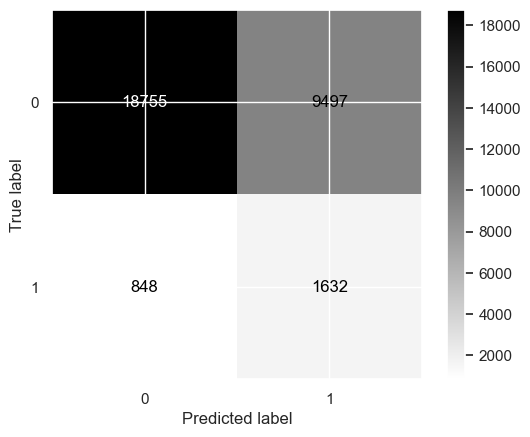

In [214]:
# predict with LGBM Improved

lgbm_imp_train = lgbm_imp.predict(X_train_final)
lgbm_imp_test = lgbm_imp.predict(X_test_final)

print('Classification report for LGBM Improved train-set:')
print('')
print(classification_report(y_train_final, lgbm_imp_train))
print('*'*55)
print('Classification report for LGBM Improved test-set:')
print('')
print(classification_report(y_test, lgbm_imp_test))
print('')
print('Confusion Matrix for LGBM Improved test-set:')
ConfusionMatrixDisplay.from_estimator(lgbm_imp, X_test_final, y_test, cmap='binary')
plt.show()

In [215]:
# calculate the AUC-ROC score for the Improved LGBM algorithm 

lgbm_imp_val_pred = lgbm_imp.predict_proba(X_val_final)[:, 1]
lgbm_imp_val_auc = roc_auc_score(y_val, lgbm_imp_val_pred)

print("LGBM Improved Validation AUC:", round(lgbm_imp_val_auc, 5))

LGBM Improved Validation AUC: 0.7254


After the hyperparameter tuning process, we found that the fine-tuned `LGBM` model continued to exhibit a good statistical fit. The metric score results between the training set and the test set remained consistent, indicating that the model's performance generalized well to unseen data.

Furthermore, we observed a slight improvement in the classification report and the `AUC-ROC` score after tuning. The AUC-ROC score <mark>increased from 0.72436 to 0.7254</mark>, indicating a slightly better ability to distinguish between positive and negative samples.

One promising aspect of the fine-tuned model was a slight decrease in predicting false negatives. This is a positive development as it indicates that the model is moving in the right direction. Although there are still over 800 false negatives, we believe that further improvements can be made to address this issue.

To further enhance the model's performance and reduce the number of false negatives, we can explore additional strategies. This may involve refining the feature engineering process, considering different model architectures, or employing advanced techniques such as ensemble learning. By carefully evaluating and fine-tuning these aspects, we aim to continuously improve the model's predictive accuracy and mitigate the risk of false negatives.

## ix. Model Saving

In this session, we will save all the needed files so that we can run the model inference and deployment flawlessly and efficiently.

In [223]:
# preparation for LGBM model saving

all_process_lgbm_imp = Pipeline([
        ('preprocessing', preprocess),
        ('under', RandomUnderSampler(random_state = 42)),
        ('classifier', LGBMClassifier(random_state = 42, boosting_type = 'gbdt', n_estimators = 10000, learning_rate = 0.01, objective = 'binary', 
                        num_leaves = 58, max_depth = 11, min_child_weight = 8, min_child_samples = 165,
                        reg_alpha = 3.5, reg_lambda = 4.9, colsample_bytree = 0.6, min_split_gain = 0.2, subsample = 0.8,
                        is_unbalance = False, max_bin = 405, silent = -1, verbose = -1))
        ])

all_process_lgbm_imp.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('pca',
                                                                   PCA(n_components=0.9,
                                                                       random_state=42))]),
                                                  ['ext_source_3',
                                                   'ext_source_2', 'days_birth',
                                                   'credit_income_percent',
                                                   'annuity_income_percent',
                                                   'credit_term',
                                                   'days_employed_percent']),
                                                 ('ohe',
                                                  Pipeline(steps=[('o...
                ('under', RandomUnderSampler(random_state=42)),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.6, is_unbalance=False,
                                learning_rate=0.01, max_bin=405, max_depth=11,
                                min_child_samples=165, min_child_weight=8,
                                min_split_gain=0.2, n_estimators=10000,
                                num_leaves=58, objective='binary',
                                random_state=42, reg_alpha=3.5, reg_lambda=4.9,
                                silent=-1, subsample=0.8, verbose=-1))])

In [224]:
# save the model

pickle.dump(all_process_lgbm_imp, open('model.pkl', 'wb'))

## x. Model Inference

Model Inference will be done in the other notebook in order to avoid any errors, and it is an attempt to get as accurate results as possible.

## xi. Conclusion

Default risk assessment is crucial for lenders to evaluate the likelihood of borrowers failing to repay loans. The EDA reveals an imbalance in loan repayment rates and identifies relationships between features and loan repayment. The high representation of laborers among borrowers suggests potential financial challenges. Younger applicants have a higher likelihood of loan default, while certain occupation types face difficulties in repayment. Modifying the occupation data highlights the prevalence of working as the primary income source. These insights enable lenders to make informed decisions, design tailored products, and mitigate default risks.

The evaluation <mark>metric score</mark> used in this case is <mark>recall</mark>, which measures the proportion of true positive predictions out of all actual positive instances. Recall is valuable when the objective is to <mark>minimize false negatives</mark> and ensure all positive instances are identified. For example, if we predict that a particular person is able to pay, but in reality that person is unable to pay, this is what we call a false negative in our case, and we want to minimize this case as much as possible because it could impact the business in a bad way. The <mark>possible losses</mark> that can occur if we predict the default payment wrongly are: Financial loss for lenders, increased default risk, higher borrowing costs, and trust and reputation.

Both the Machine Learning and Deep Learning model, both before and after tuning for Machine Learning, exhibit a good statistical fit. Following the hyperparameters tuning, the Machine Learning LGBM algorithm demonstrated an overall improvement, particularly in the crucial aspect of minimizing false negatives. It can predict the false negatives more accurately after the hyperparameters tuning.

The <mark>strength</mark> of our model is effective in handling large dataset. LGBM is designed to handle datasets with a high number of instances and features. It can efficiently handle high-dimensional data and large-scale problems without requiring extensive feature engineering, making it suitable for default risk prediction tasks where the relationships between features and the target can be intricate, which will benefit the company tremendously.

One of the <mark>weakness</mark> faced in our model is its sensitivity to hyperparameters. Although LGBM offers a wide range of hyperparameters to optimize model performance, finding the optimal parameter configuration can be time-consuming and require significant computational resources. Improper tuning of these components can lead to suboptimal performance or overfitting. Therefore, achieving optimal results necessitates careful optimization, deep domain knowledge, and expertise from professionals to effectively configure and run the model.

In order to <mark>improve</mark> future results, several key areas can be addressed. Firstly, conducting more thorough <mark>feature engineering</mark> can help identify important features that effectively differentiate between classes. Secondly, <mark>exploring</mark> a wider range of <mark>algorithms</mark> can lead to the selection of the most suitable one for the dataset. Thirdly, <mark>utilizing algorithms</mark> specifically designed to handle <mark>imbalanced</mark> datasets can improve performance. Lastly, <mark>hyperparameter tuning</mark> should be carefully performed to find the optimal balance without overfitting. By focusing on these areas, future iterations can enhance the churn prediction model, leading to more accurate and reliable results.

____